# Caracterização metereológica da área de estudo

Desenvolvedora: Cecília Fonseca

Avaliaremos os seguintes pontos:
1. Metereologia de superfície
2. Meteorologia upperair ou sondagem/perfil da atmosfera
3. Superfície - Albedo, razão de Bowen e Rugosidade

### 1. Metereologia de Superfície

Analisaremos os dados de metar (estação metereológica em aeroportos). Os dados serão coletadosna plataforma
https://hoinaski.prof.ufsc.br/BRAIN/getMETAR

Os dados estarão na pasta inputs/meteoSuperficie com a nomenclatura metar.csv

In [1]:
# Selecionar arquivo para análise
import os

# Pegando o caminho do diretório que estou
rootPath = os.getcwd()
print(rootPath)

# Definindo o diretório com os arquivos metar
metSuperficiePath = rootPath +'\\inputs\\meteoSuperficie'
print(metSuperficiePath)

# Listando os arquivos dentro do diretório
files = os.listdir(metSuperficiePath)
print(files)

C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173
C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\inputs\meteoSuperficie
['metar_2023.csv']


In [2]:
# Abrindo os arquivos metar
import pandas as pd

# Abrindo cada arquivo dentro da pasta e acumulando em uma lista chamada de metSuperficie
metSuperficie=[]
metSuperficie.append(pd.read_csv(metSuperficiePath+'\\metar_2023.csv'))

# Convertendo metSuperficie para DataFrame
metSuperficie = pd.concat(metSuperficie)

print(metSuperficie)
print(type(metSuperficie))

      day  month  year  hour  ct     wd        ws      hc  ccp  cco  \
0       1      1  2023     0 NaN  360.0  5.144440  2133.6  3.0  3.0   
1       1      1  2023     1 NaN  360.0  4.115552  3048.0  6.0  6.0   
2       1      1  2023     2 NaN  360.0  4.115552  3048.0  6.0  6.0   
3       1      1  2023     3 NaN  350.0  4.629996  3048.0  6.0  6.0   
4       1      1  2023     4 NaN  340.0  5.144440  1219.2  6.0  6.0   
...   ...    ...   ...   ...  ..    ...       ...     ...  ...  ...   
8753   31     12  2023    19 NaN  110.0  4.629996  2438.4  6.0  6.0   
8754   31     12  2023    20 NaN  130.0  3.601108  2438.4  6.0  6.0   
8755   31     12  2023    21 NaN  120.0  2.057776  2438.4  6.0  6.0   
8756   31     12  2023    22 NaN  190.0  2.057776  2438.4  6.0  6.0   
8757   31     12  2023    23 NaN  140.0  2.057776  2438.4  6.0  6.0   

                p  temp  dpTemp  vis   pw   relh  
0     1009.658428  25.0    22.0  NaN  0.0  83.44  
1     1009.654835  25.0    22.0  NaN  0.0  83

In [3]:
# Criar uma coluna com Datetime dos dados

# Criar uma coluna de data e hora combinando as colunas separadas
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])
print(metSuperficie['datetime'])

# Definido a coluna de datetime como índice da matriz
metSuperficie.set_index(metSuperficie['datetime'])

0      2023-01-01 00:00:00
1      2023-01-01 01:00:00
2      2023-01-01 02:00:00
3      2023-01-01 03:00:00
4      2023-01-01 04:00:00
               ...        
8753   2023-12-31 19:00:00
8754   2023-12-31 20:00:00
8755   2023-12-31 21:00:00
8756   2023-12-31 22:00:00
8757   2023-12-31 23:00:00
Name: datetime, Length: 8758, dtype: datetime64[ns]


,day,month,year,hour,ct,wd,ws,hc,ccp,cco,p,temp,dpTemp,vis,pw,relh,datetime
datetime,,,,,,,,,,,,,,,,,
2023-01-01 00:00:00,1,1,2023,0,NaN,360.0,5.144440,2133.6,3.0,3.0,1009.658428,25.0,22.0,NaN,0.0,83.44,2023-01-01 00:00:00
2023-01-01 01:00:00,1,1,2023,1,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 01:00:00
2023-01-01 02:00:00,1,1,2023,2,NaN,360.0,4.115552,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 02:00:00
2023-01-01 03:00:00,1,1,2023,3,NaN,350.0,4.629996,3048.0,6.0,6.0,1009.654835,25.0,22.0,NaN,0.0,83.44,2023-01-01 03:00:00
2023-01-01 04:00:00,1,1,2023,4,NaN,340.0,5.144440,1219.2,6.0,6.0,1009.658428,25.0,22.0,NaN,0.0,83.44,2023-01-01 04:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 19:00:00,31,12,2023,19,NaN,110.0,4.629996,2438.4,6.0,6.0,1009.651241,25.0,18.0,NaN,0.0,65.12,2023-12-31 19:00:00
2023-12-31 20:00:00,31,12,2023,20,NaN,130.0,3.601108,2438.4,6.0,6.0,1009.651241,24.0,18.0,NaN,0.0,69.14,2023-12-31 20:00:00
2023-12-31 21:00:00,31,12,2023,21,NaN,120.0,2.057776,2438.4,6.0,6.0,1009.654835,24.0,18.0,NaN,0.0,69.14,2023-12-31 21:00:00


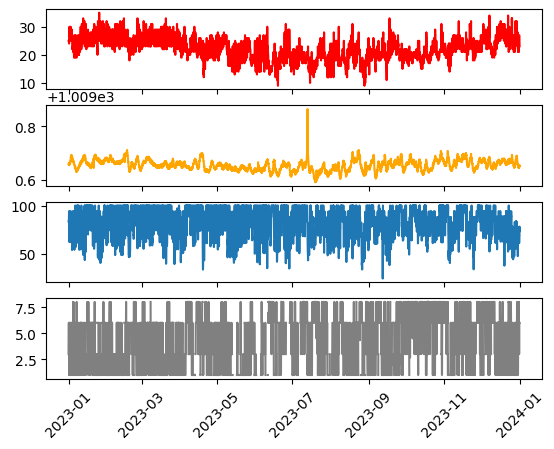

In [4]:
# Analisando os dados através de figuras
import matplotlib.pyplot as plt

fig,ax = plt.subplots(4,sharex=True)
ax[0].plot(metSuperficie['datetime'],metSuperficie['temp'],color='red')
ax[1].plot(metSuperficie['datetime'],metSuperficie['p'],color='orange')
ax[2].plot(metSuperficie['datetime'],metSuperficie['relh'])
ax[3].plot(metSuperficie['datetime'],metSuperficie['cco'],color='gray')
ax[3].tick_params(axis='x', rotation=45)

# Diretório para salvar as figuras
output_dir = r'C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\Figuras'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Salvar a figura
fig_path = os.path.join(output_dir, 'analise_dados_superficie.png')
plt.savefig(fig_path)

# Exibir a figura
plt.show()

o percentil 95 da temperatura é 31.0
o percentil 95 da pressão é 1009.6967607391396
o percentil 95 da altura é 100.0
o percentil 95 da cobertura de nuvem é 8.0


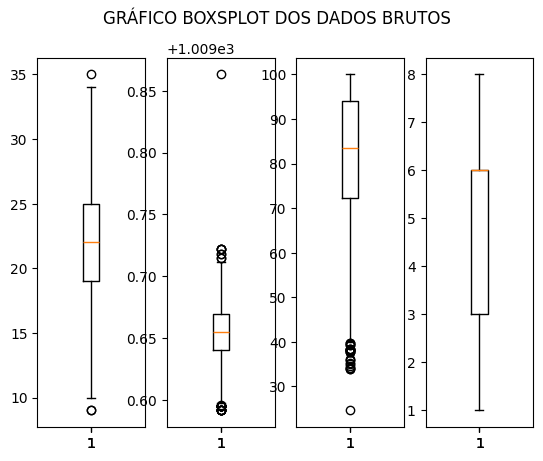

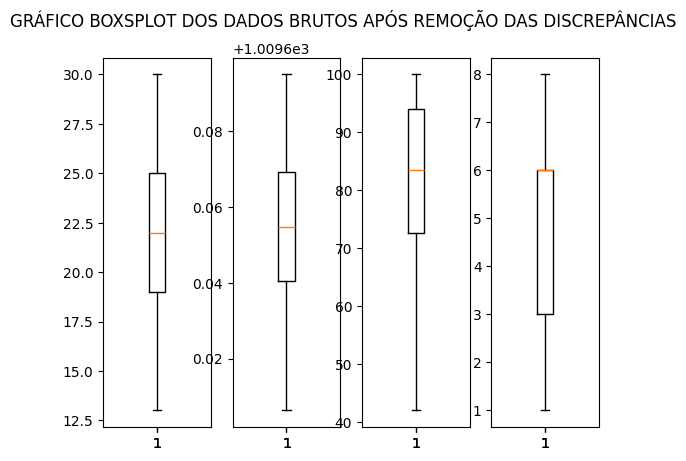

In [5]:
import numpy as np
# fazendo box plot das variáveis
fig,ax = plt.subplots(1,4,sharex=True)
fig.suptitle('GRÁFICO BOXSPLOT DOS DADOS BRUTOS')
ax[0].boxplot(metSuperficie['temp'])
ax[1].boxplot(metSuperficie['p'])
ax[2].boxplot(metSuperficie['relh'])
ax[3].boxplot(metSuperficie['cco'][~np.isnan(metSuperficie['cco'])])
ax[3].tick_params(axis='x')

#removendo valores acima do percentil 95°
temp99 = np.percentile(metSuperficie['temp'],99)
print('o percentil 95 da temperatura é ' +str(temp99))
p99 = np.percentile(metSuperficie['p'],99)
print('o percentil 95 da pressão é ' +str(p99))
relh99 = np.percentile(metSuperficie['relh'],99)
print('o percentil 95 da altura é ' +str(relh99))
cco99 = np.nanpercentile(metSuperficie['cco'],99)
print('o percentil 95 da cobertura de nuvem é ' +str(cco99))
fig,ax = plt.subplots(1,4,sharex=True)
fig.suptitle('GRÁFICO BOXSPLOT DOS DADOS BRUTOS APÓS REMOÇÃO DAS DISCREPÂNCIAS')
ax[0].boxplot(metSuperficie['temp'][(metSuperficie['temp']<temp99) & (metSuperficie['temp']>np.percentile(metSuperficie['temp'],0.5))])
ax[1].boxplot(metSuperficie['p'][(metSuperficie['p']<p99) & (metSuperficie['p']>np.percentile(metSuperficie['p'],0.5))])
ax[2].boxplot(metSuperficie['relh'][(metSuperficie['relh']>np.percentile(metSuperficie['relh'],0.5))])
ax[3].boxplot(metSuperficie['cco'][~np.isnan(metSuperficie['cco'])])
ax[3].tick_params(axis='x')

# Salvar a figura
fig_path = os.path.join(output_dir, 'boxplot_dados_superficie_95percentil.png')
plt.savefig(fig_path)

plt.show()

C:\Users\cecil\AppData\Local\Temp\ipykernel_19408\3480116328.py:18: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = metSuperficie.resample('M').mean()
C:\Users\cecil\AppData\Local\Temp\ipykernel_19408\3480116328.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  min_mensal = metSuperficie.resample('M').min()


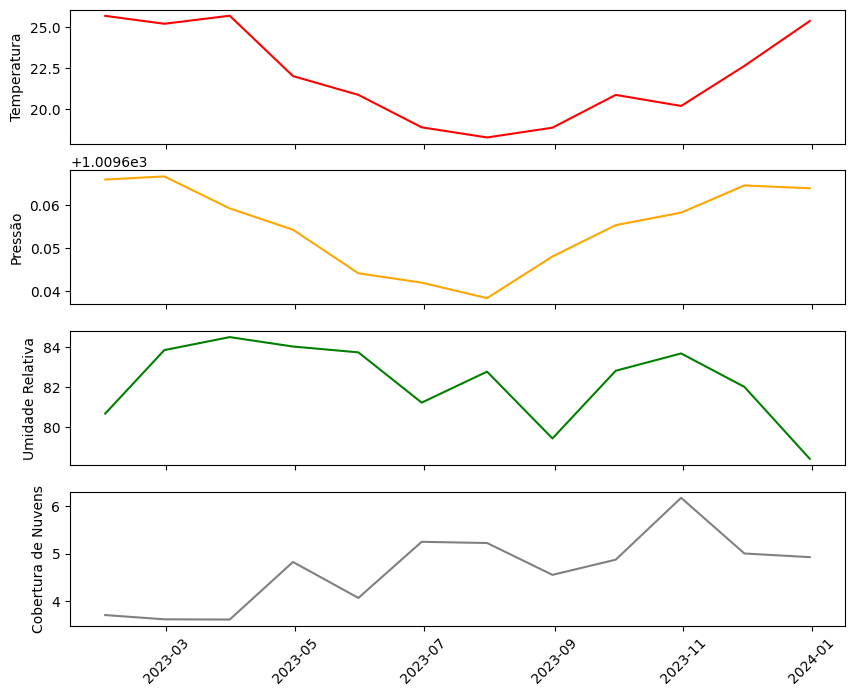

            day  month  year  hour  ct   wd   ws      hc  ccp  cco  \
datetime                                                             
2023-01-31    1      1  2023     0 NaN  0.0  0.0  274.32  1.0  1.0   
2023-02-28    1      2  2023     0 NaN  0.0  0.0  121.92  1.0  1.0   
2023-03-31    1      3  2023     0 NaN  0.0  0.0  182.88  1.0  1.0   
2023-04-30    1      4  2023     0 NaN  0.0  0.0  243.84  1.0  1.0   
2023-05-31    1      5  2023     0 NaN  0.0  0.0  152.40  1.0  1.0   
2023-06-30    1      6  2023     0 NaN  0.0  0.0  121.92  1.0  1.0   
2023-07-31    1      7  2023     0 NaN  0.0  0.0   76.20  1.0  1.0   
2023-08-31    1      8  2023     0 NaN  0.0  0.0   45.72  1.0  1.0   
2023-09-30    1      9  2023     0 NaN  0.0  0.0   45.72  1.0  1.0   
2023-10-31    1     10  2023     0 NaN  0.0  0.0  121.92  1.0  1.0   
2023-11-30    1     11  2023     0 NaN  0.0  0.0  152.40  1.0  1.0   
2023-12-31    1     12  2023     0 NaN  0.0  0.0  182.88  1.0  1.0   

                   

In [6]:
# Estatísticas dos dados

import pandas as pd
import matplotlib.pyplot as plt
import os

# Carregar o arquivo CSV
file_path = r'C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\inputs\meteoSuperficie\metar_2023.csv'
metSuperficie = pd.read_csv(file_path)

# Criar uma coluna de datetime combinando as colunas de ano, mês, dia e hora
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])

# Definir a coluna de datetime como índice
metSuperficie.set_index('datetime', inplace=True)

# Calcular a média mensal e o mínimo mensal
media_mensal = metSuperficie.resample('M').mean()
min_mensal = metSuperficie.resample('M').min()

# Plotar os resultados
fig, ax = plt.subplots(4, sharex=True, figsize=(10, 8))
ax[0].plot(media_mensal.index, media_mensal['temp'], color='red')
ax[0].set_ylabel('Temperatura')
ax[1].plot(media_mensal.index, media_mensal['p'], color='orange')
ax[1].set_ylabel('Pressão')
ax[2].plot(media_mensal.index, media_mensal['relh'], color='green')
ax[2].set_ylabel('Umidade Relativa')
ax[3].plot(media_mensal.index, media_mensal['cco'], color='gray')
ax[3].set_ylabel('Cobertura de Nuvens')
ax[3].tick_params(axis='x', rotation=45)

# Diretório para salvar as figuras
output_dir = r'C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\Figuras'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Salvar a figura
fig_path = os.path.join(output_dir, 'media_mensal_superficie.png')
plt.savefig(fig_path)

plt.show()

# Exibir o mínimo mensal
print(min_mensal)

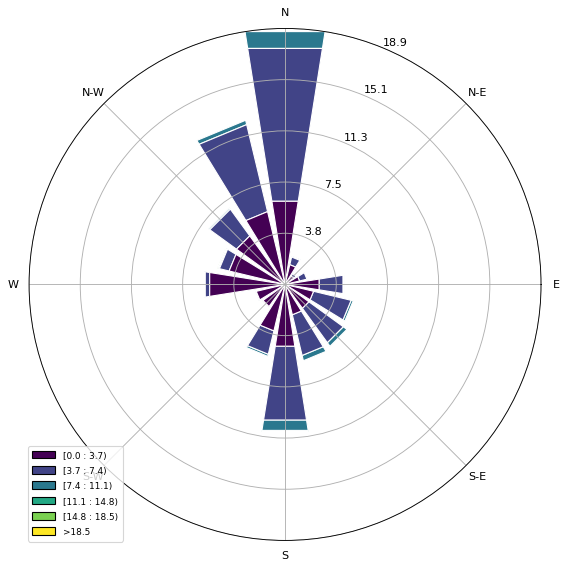

In [7]:
# Criando minha rosa dos ventos
import pandas as pd
import matplotlib.pyplot as plt
import os
from windrose import WindroseAxes

# Carregar o arquivo CSV
file_path = r'C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\inputs\meteoSuperficie\metar_2023.csv'
metSuperficie = pd.read_csv(file_path)

# Criar a rosa dos ventos
ax = WindroseAxes.from_ax()
ax.bar(metSuperficie['wd'], metSuperficie['ws'], normed=True, opening=0.8, edgecolor="white")
ax.set_legend()

# Diretório para salvar as figuras
output_dir = r'C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\Figuras'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Salvar a figura
fig_path = os.path.join(output_dir, 'rosa_dos_ventos.png')
plt.savefig(fig_path)

plt.show()

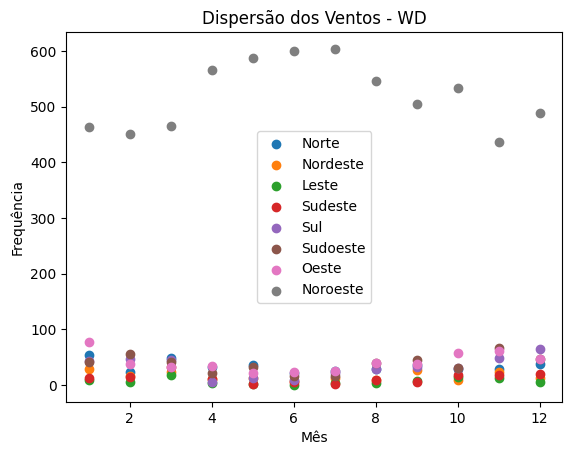

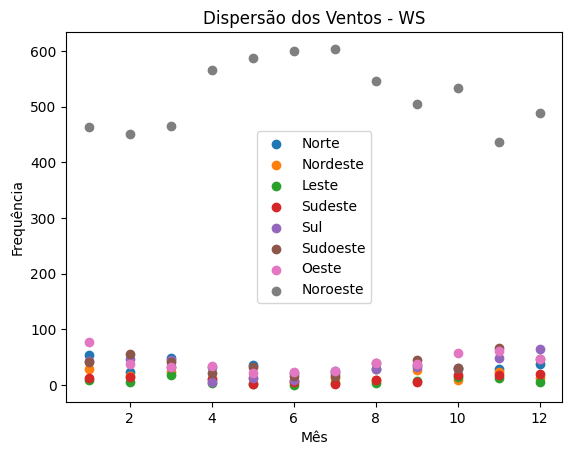

In [8]:
# analisando ventos mais profundamente, cada quadrante, dispersoes anuais

import numpy as np
import matplotlib.pyplot as plt
import os

# Definir os quadrantes
quadrantes = {
    'Norte': range(0, 11),
    'Nordeste': range(11, 34),
    'Leste': range(34, 56),
    'Sudeste': range(56, 79),
    'Sul': range(79, 101),
    'Sudoeste': range(101, 124),
    'Oeste': range(124, 146),
    'Noroeste': range(146, 361)
}

# Loop sobre cada tipo de vento
for tipo in ['wd', 'ws']:  # Alteração aqui para os tipos de vento corretos
    # Filtrar os dados para o tipo de vento atual
    filtered_data = metSuperficie[metSuperficie[tipo].notnull()]
    wd = filtered_data['wd']
    ws = filtered_data['ws']
    
    # Calcular a frequência de ocorrência do vento em cada quadrante para cada mês
    frequencia_quadrantes = {quadrante: [] for quadrante in quadrantes}
    for mes in range(1, 13):
        for quadrante, intervalo in quadrantes.items():
            frequencia = ((wd >= intervalo.start) & (wd < intervalo.stop) & (filtered_data['month'] == mes)).sum()
            frequencia_quadrantes[quadrante].append(frequencia)
    
    # Plotar gráfico de dispersão dos ventos para cada quadrante
    for quadrante, frequencias in frequencia_quadrantes.items():
        plt.scatter(range(1, 13), frequencias, label=quadrante)

    plt.title(f'Dispersão dos Ventos - {tipo.upper()}')  # Alteração aqui para exibir o tipo corretamente
    plt.xlabel('Mês')
    plt.ylabel('Frequência')
    plt.legend()
    
    # Diretório para salvar as figuras
    output_dir = r'C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\Figuras'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Salvar a figura
    fig_path = os.path.join(output_dir, f'dispersao_ventos_{tipo}.png')
    plt.savefig(fig_path)

    plt.show()

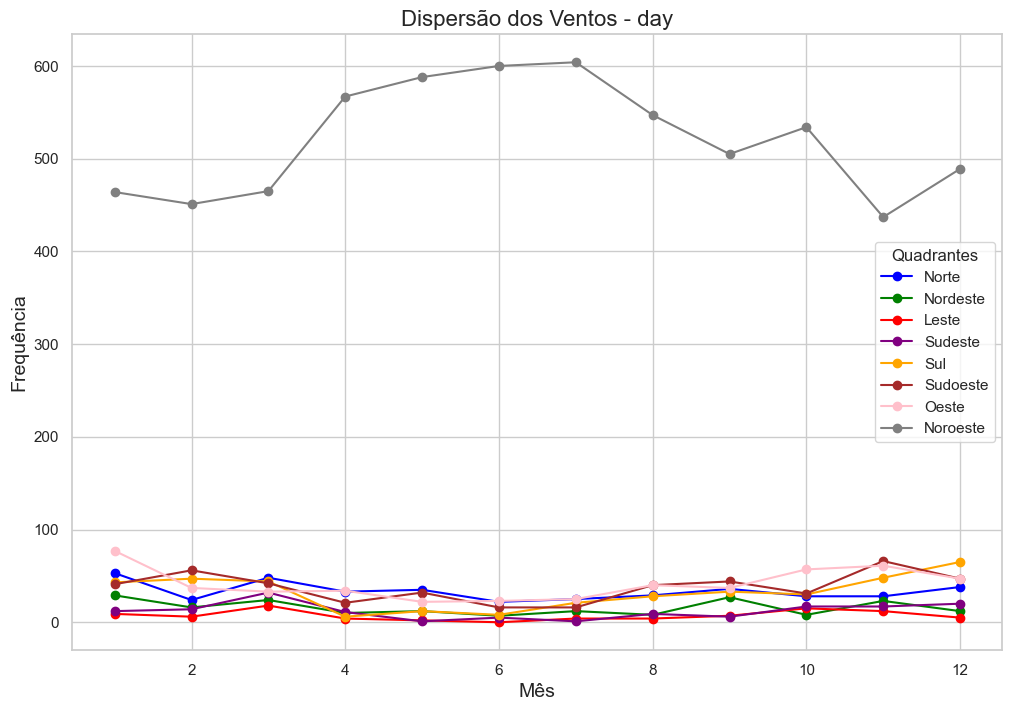

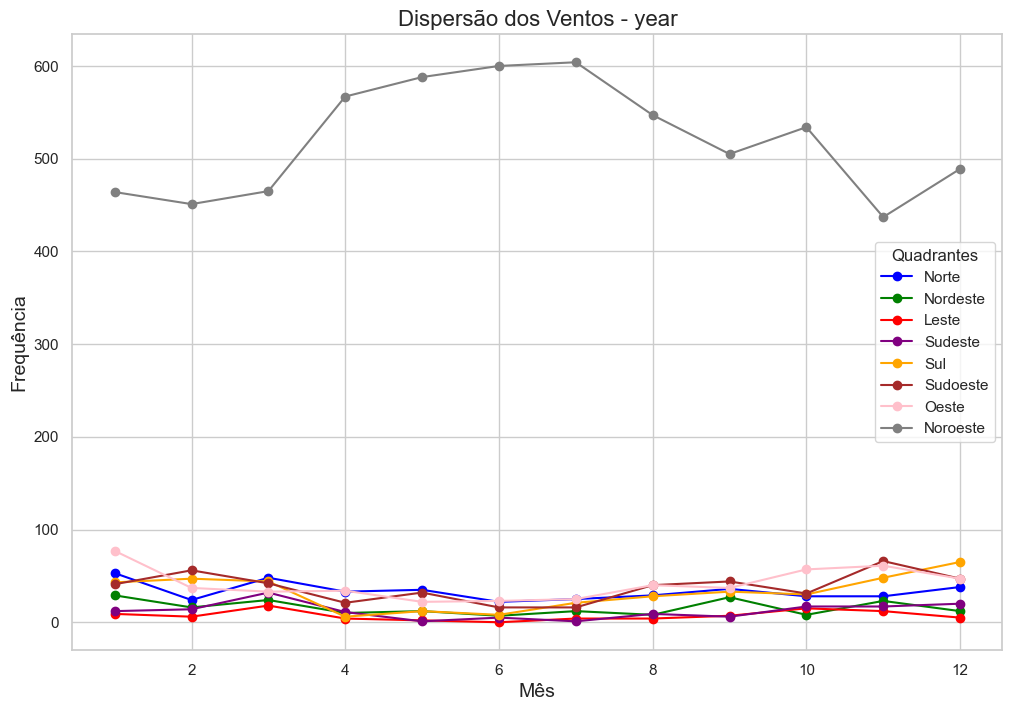

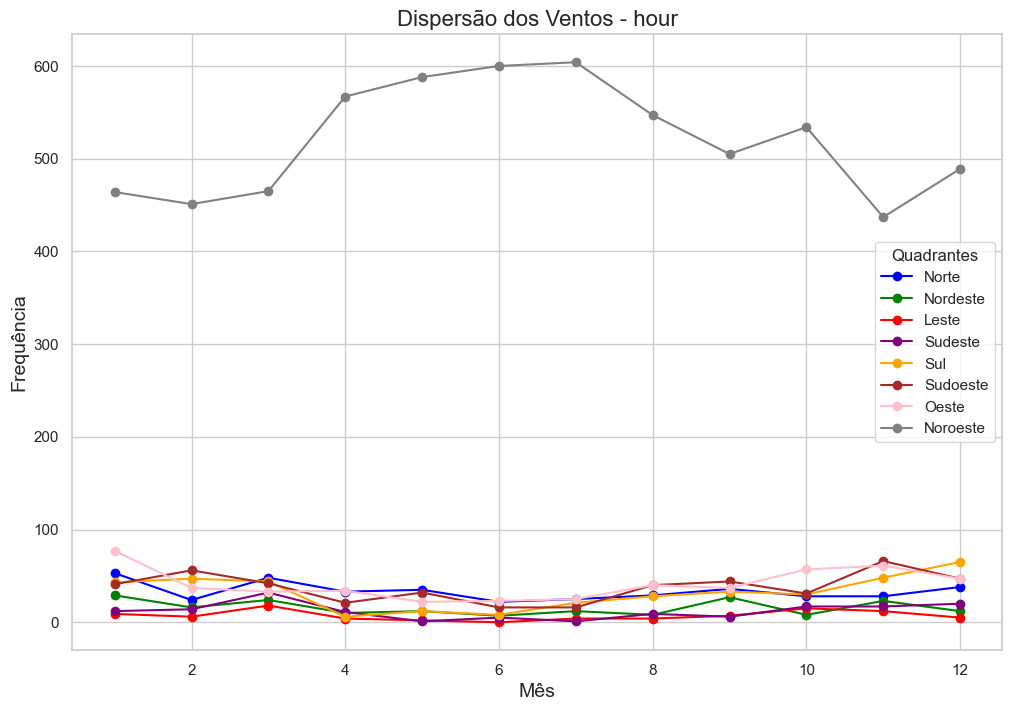

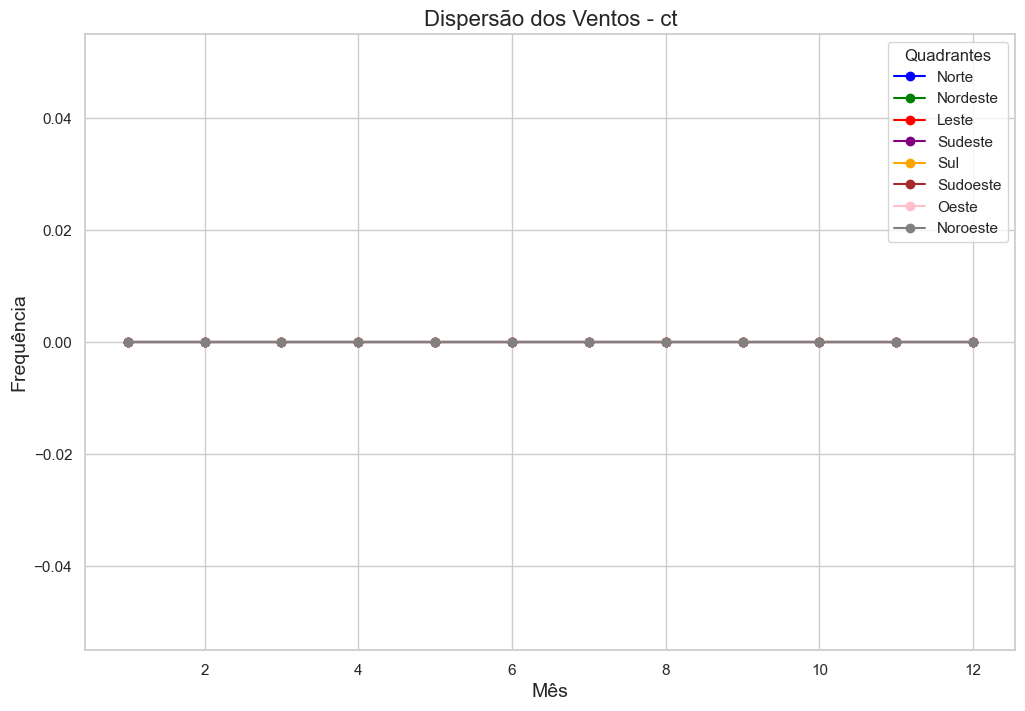

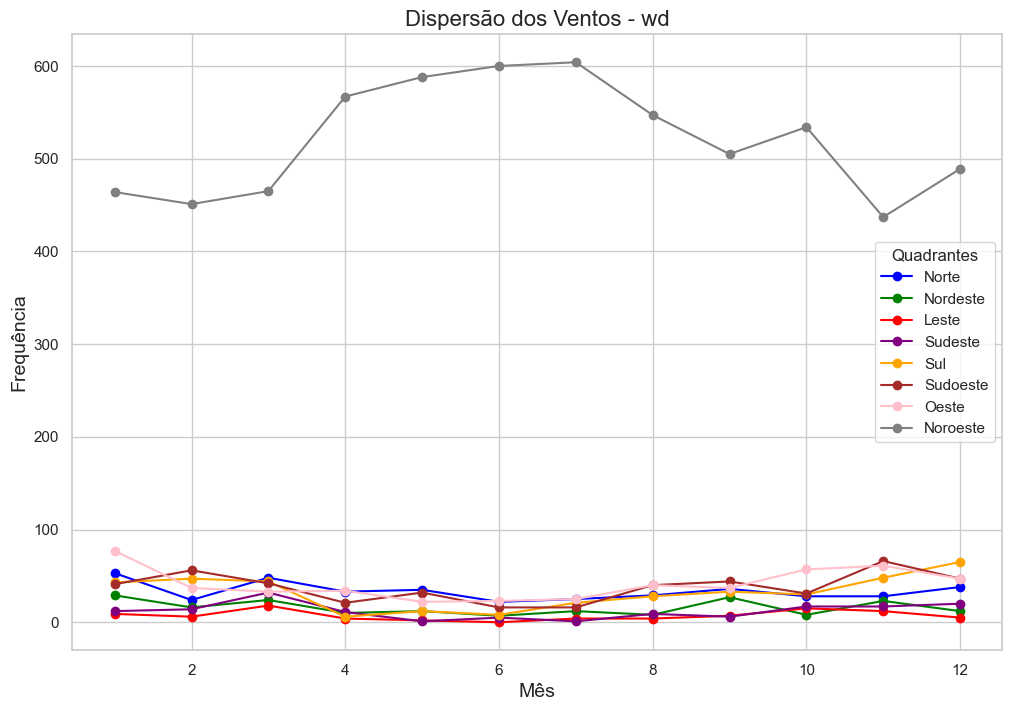

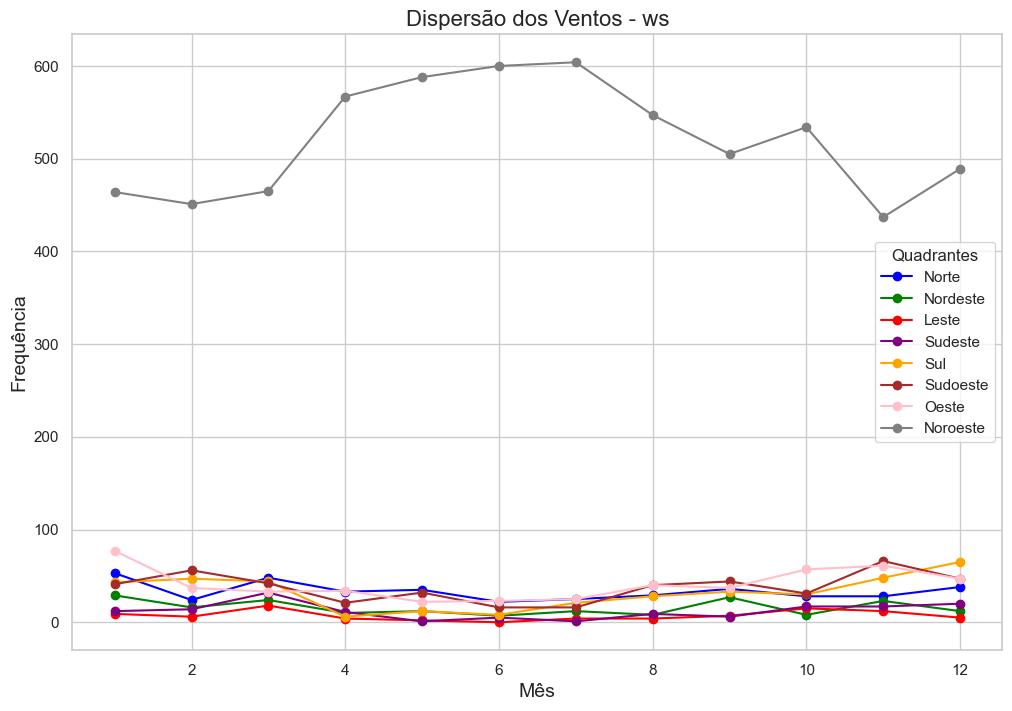

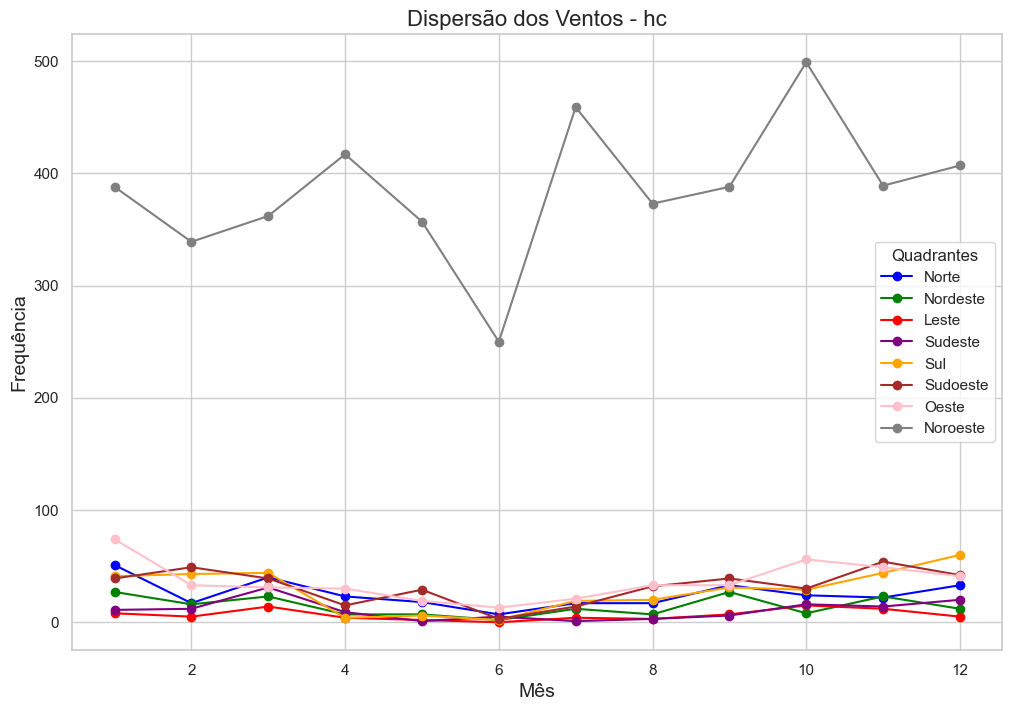

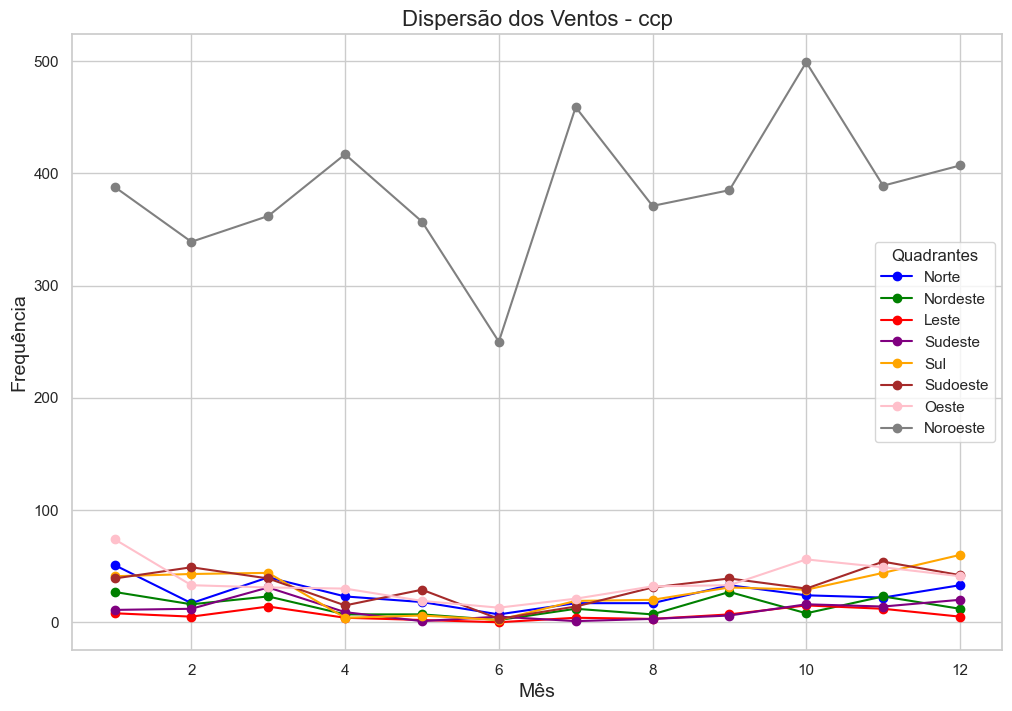

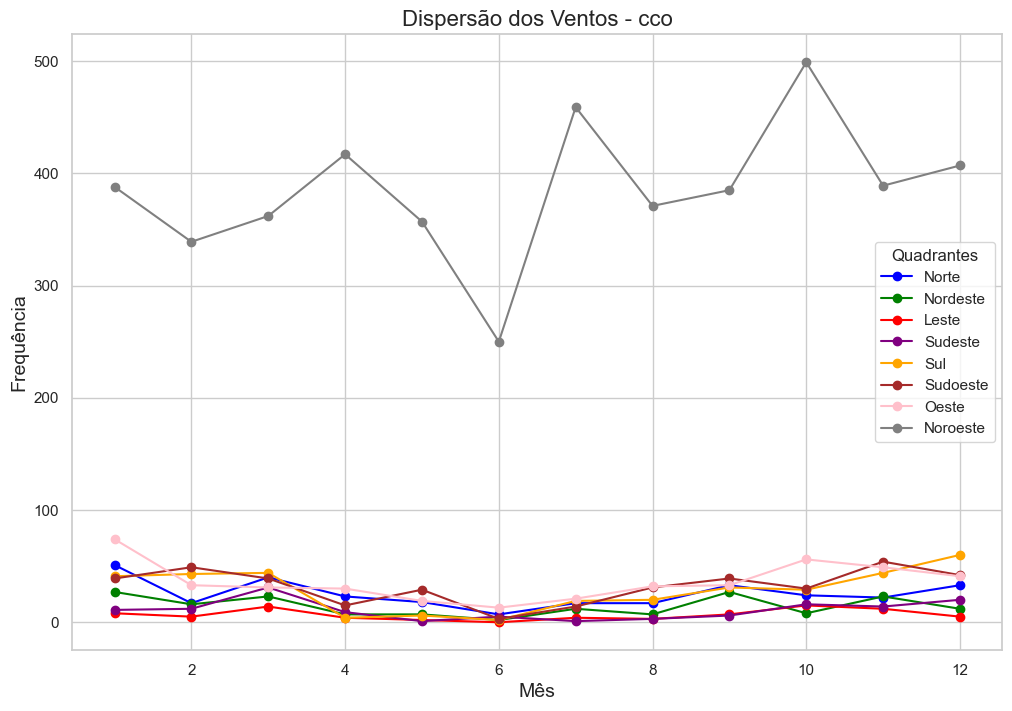

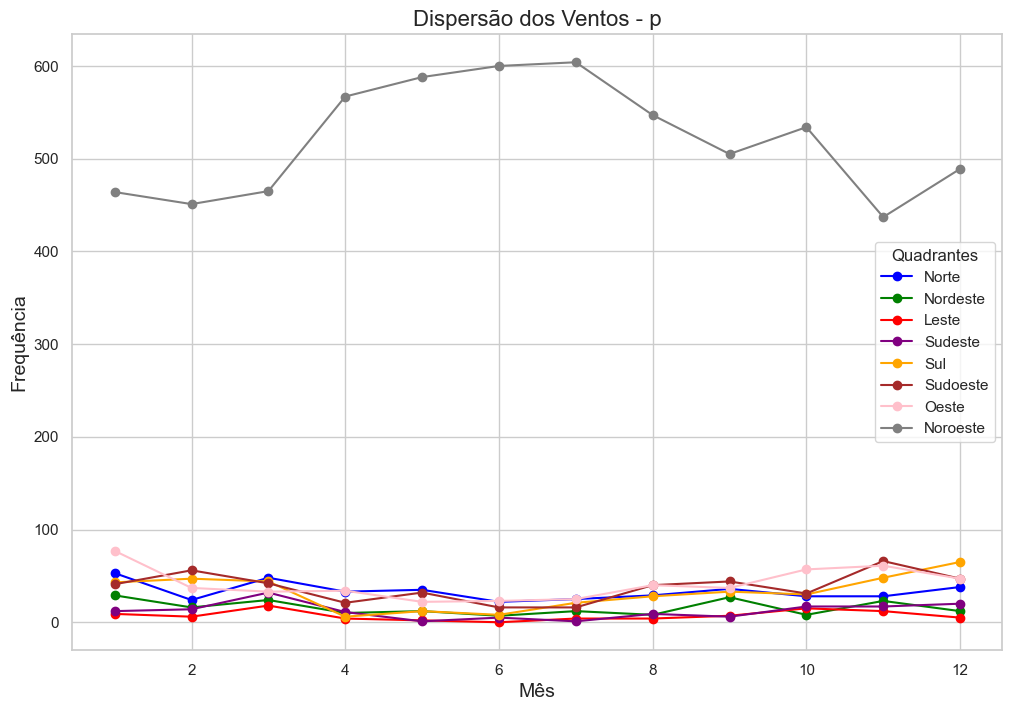

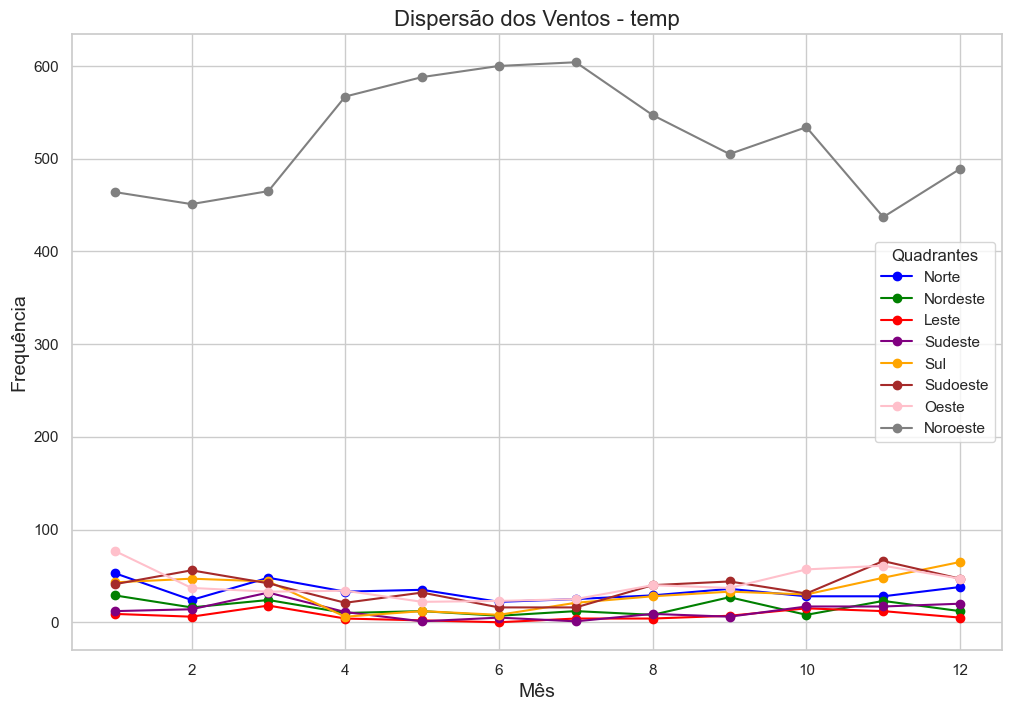

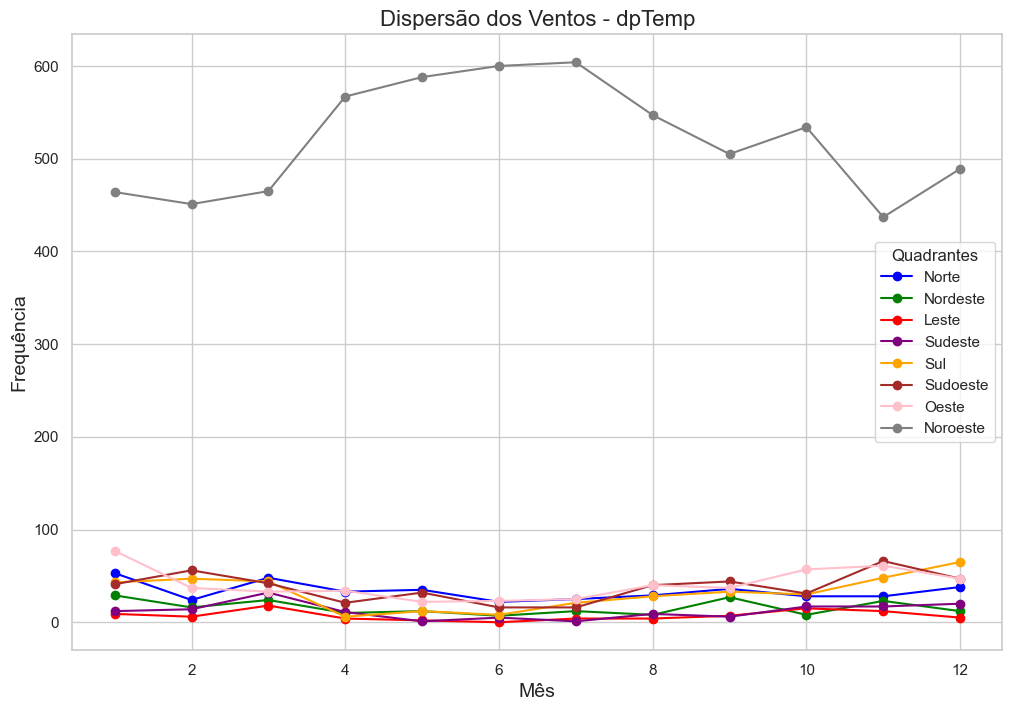

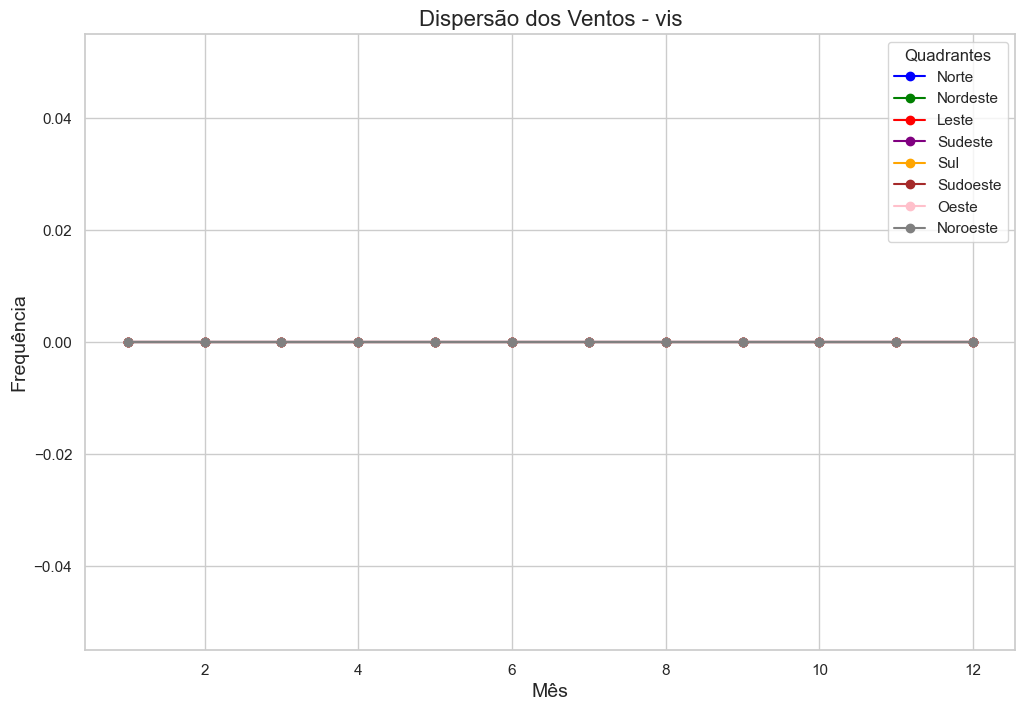

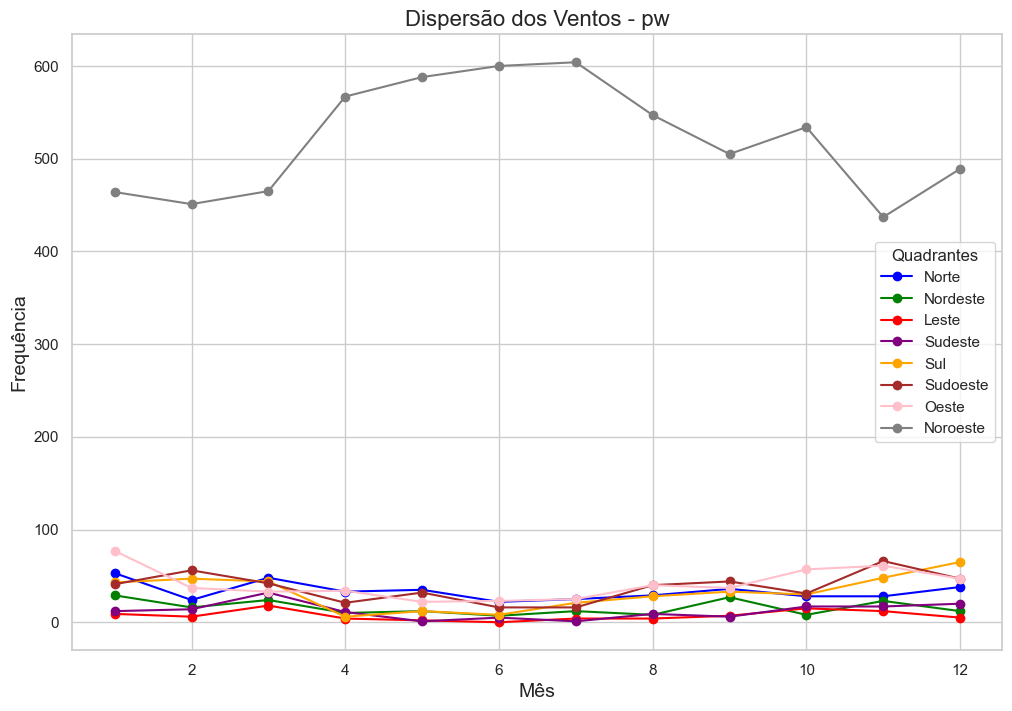

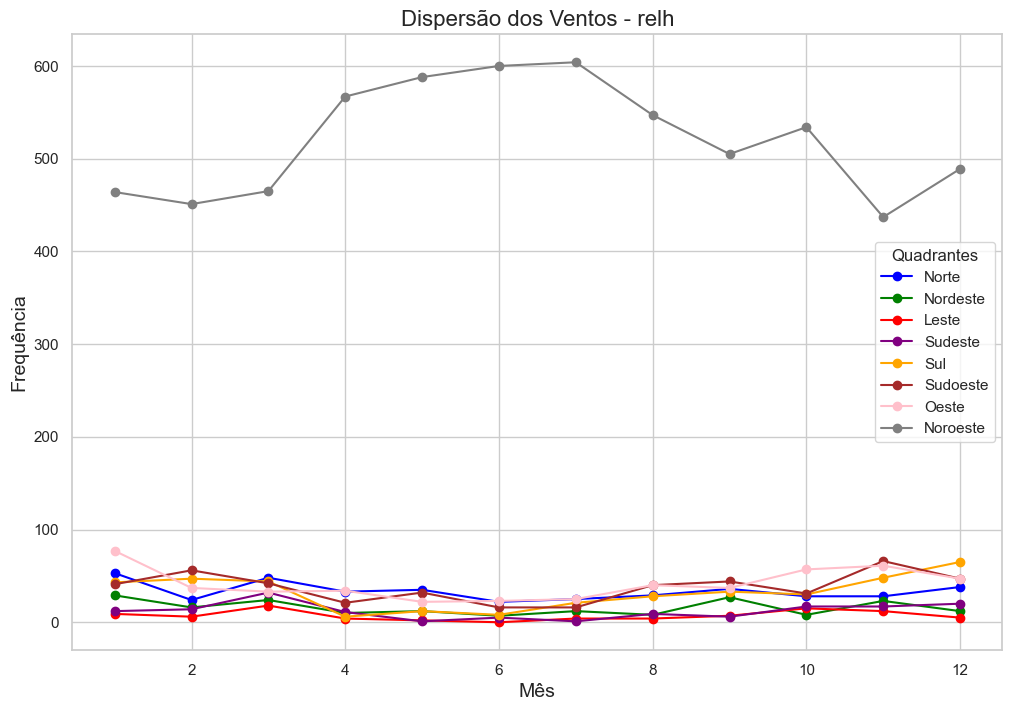

In [9]:
#continuando analise de dispersão do vento, frequencia

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Configurar o estilo do seaborn para gráficos mais profissionais
sns.set(style="whitegrid")

# Definir os quadrantes
quadrantes = {
    'Norte': range(0, 11),
    'Nordeste': range(11, 34),
    'Leste': range(34, 56),
    'Sudeste': range(56, 79),
    'Sul': range(79, 101),
    'Sudoeste': range(101, 124),
    'Oeste': range(124, 146),
    'Noroeste': range(146, 361)
}

# Definir um dicionário de cores para os quadrantes
cores_quadrantes = {
    'Norte': 'blue',
    'Nordeste': 'green',
    'Leste': 'red',
    'Sudeste': 'purple',
    'Sul': 'orange',
    'Sudoeste': 'brown',
    'Oeste': 'pink',
    'Noroeste': 'gray'
}

# Dados fictícios para exemplo
# metSuperficie = pd.DataFrame({
#     'wd': np.random.randint(0, 360, 1000),
#     'ws': np.random.rand(1000) * 10,
#     'month': np.random.randint(1, 13, 1000)
# })

# Definir tipos_vento como todas as colunas, exceto 'month'
tipos_vento = [coluna for coluna in metSuperficie.columns if coluna != 'month']

# Loop sobre cada tipo de vento
for tipo in tipos_vento:
    # Filtrar os dados para o tipo de vento atual
    filtered_data = metSuperficie[metSuperficie[tipo].notnull()]
    wd = filtered_data['wd']
    ws = filtered_data['ws']
    
    # Calcular a frequência de ocorrência do vento em cada quadrante para cada mês
    frequencia_quadrantes = {quadrante: [] for quadrante in quadrantes}
    for mes in range(1, 13):
        for quadrante, intervalo in quadrantes.items():
            frequencia = ((wd >= intervalo.start) & (wd < intervalo.stop) & (filtered_data['month'] == mes)).sum()
            frequencia_quadrantes[quadrante].append(frequencia)
    
    # Criar figura
    plt.figure(figsize=(12, 8))
    
    # Plotar gráfico de dispersão dos ventos para cada quadrante
    for quadrante, frequencias in frequencia_quadrantes.items():
        plt.plot(range(1, 13), frequencias, marker='o', linestyle='-', label=quadrante, color=cores_quadrantes[quadrante])
    
    # Configurar título e rótulos
    plt.title(f'Dispersão dos Ventos - {tipo}', fontsize=16)
    plt.xlabel('Mês', fontsize=14)
    plt.ylabel('Frequência', fontsize=14)
    plt.legend(title='Quadrantes')
    plt.grid(True)
    
    # Diretório para salvar as figuras
    output_dir = r'C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\Figuras'
    if not os.path.exists(output_dir):
        os.makedirs(output_dir)
    
    # Salvar a figura
    fig_path = os.path.join(output_dir, f'dispersao_ventos_{tipo}.png')
    plt.savefig(fig_path)

    # Mostrar gráfico
    plt.show()

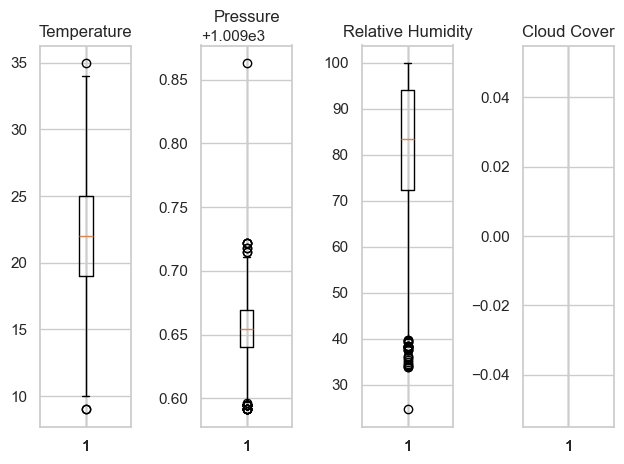

In [10]:
# Fazendo boxplot das variáveis ( temperatura , pressão , umidade relativa , cobertura de nuvens) 


import matplotlib.pyplot as plt
import os

# Configurar as subplots
fig, ax = plt.subplots(1, 4, sharex=True)

# Plotar boxplot de temperatura
ax[0].boxplot(metSuperficie['temp'])
ax[0].set_title('Temperature')

# Plotar boxplot de pressão
ax[1].boxplot(metSuperficie['p'])
ax[1].set_title('Pressure')

# Plotar boxplot de umidade relativa
ax[2].boxplot(metSuperficie['relh'])
ax[2].set_title('Relative Humidity')

# Plotar boxplot de cobertura de nuvens
ax[3].boxplot(metSuperficie['cco'])
ax[3].set_title('Cloud Cover')

# Ajustar layout
plt.tight_layout()

# Diretório para salvar as figuras
output_dir = r'C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\Figuras'
if not os.path.exists(output_dir):
        os.makedirs(output_dir)

# Salvar a figura
fig_path = os.path.join(output_dir, 'boxplots.png')
plt.savefig(fig_path)

# Exibir a figura
plt.show()


C:\Users\cecil\AppData\Local\Temp\ipykernel_19408\3445520163.py:19: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  media_mensal = metSuperficie.resample('M').mean()
C:\Users\cecil\AppData\Local\Temp\ipykernel_19408\3445520163.py:20: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  min_mensal = metSuperficie.resample('M').min()
C:\Users\cecil\AppData\Local\Temp\ipykernel_19408\3445520163.py:21: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  max_mensal = metSuperficie.resample('M').max()


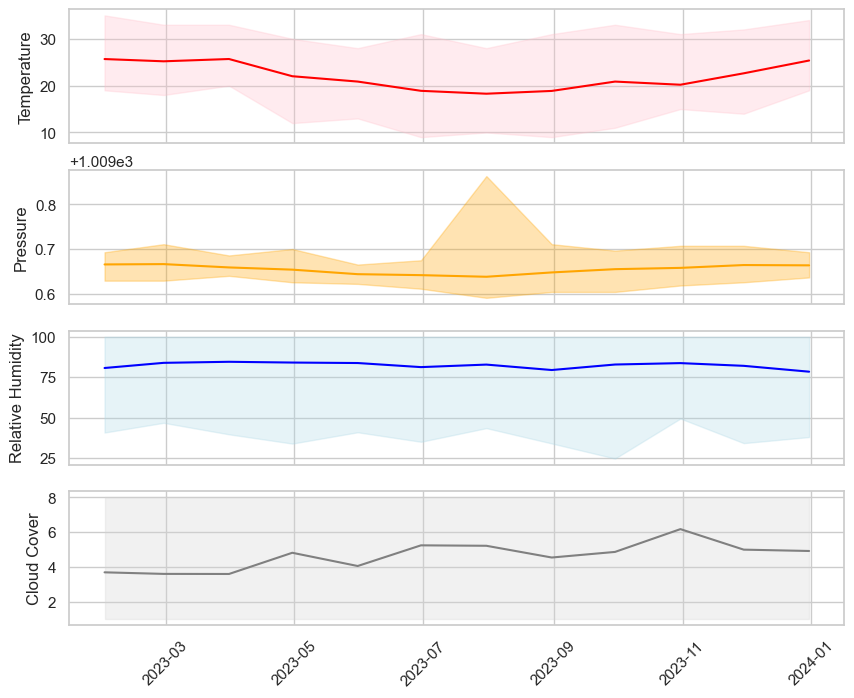

In [11]:
#gráfico das médias mensais, desenhem a média como uma linha sólida e uma sombra que determine as mínimas e máximas mensais


import pandas as pd
import matplotlib.pyplot as plt
import os

# Carregar os dados do arquivo metar_2023.csv
path_metar = r'C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\inputs\meteoSuperficie\metar_2023.csv'
metSuperficie = pd.read_csv(path_metar)

# Criar a coluna de data combinando 'day', 'month' e 'year'
metSuperficie['data'] = pd.to_datetime(metSuperficie[['year', 'month', 'day']])

# Definir a coluna de data como o índice do DataFrame
metSuperficie.set_index('data', inplace=True)

# Calcular médias mensais
media_mensal = metSuperficie.resample('M').mean()
min_mensal = metSuperficie.resample('M').min()
max_mensal = metSuperficie.resample('M').max()

# Plotar gráficos de médias mensais com sombreado para min e max
fig, ax = plt.subplots(4, sharex=True, figsize=(10, 8))

# Temperature
ax[0].plot(media_mensal.index, media_mensal['temp'], color='red', label='Mean')
ax[0].fill_between(media_mensal.index, min_mensal['temp'], max_mensal['temp'], color='pink', alpha=0.3)
ax[0].set_ylabel('Temperature')

# Pressure
ax[1].plot(media_mensal.index, media_mensal['p'], color='orange', label='Mean')
ax[1].fill_between(media_mensal.index, min_mensal['p'], max_mensal['p'], color='orange', alpha=0.3)
ax[1].set_ylabel('Pressure')

# Relative Humidity
ax[2].plot(media_mensal.index, media_mensal['relh'], color='blue', label='Mean')
ax[2].fill_between(media_mensal.index, min_mensal['relh'], max_mensal['relh'], color='lightblue', alpha=0.3)
ax[2].set_ylabel('Relative Humidity')

# Cloud Cover
ax[3].plot(media_mensal.index, media_mensal['cco'], color='gray', label='Mean')
ax[3].fill_between(media_mensal.index, min_mensal['cco'], max_mensal['cco'], color='lightgray', alpha=0.3)
ax[3].set_ylabel('Cloud Cover')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Diretório para salvar as figuras
output_dir = r'C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\Figuras'
if not os.path.exists(output_dir):
        os.makedirs(output_dir)

# Salvar a figura
fig_path = os.path.join(output_dir, 'medias_mensais.png')
plt.savefig(fig_path)

plt.show()

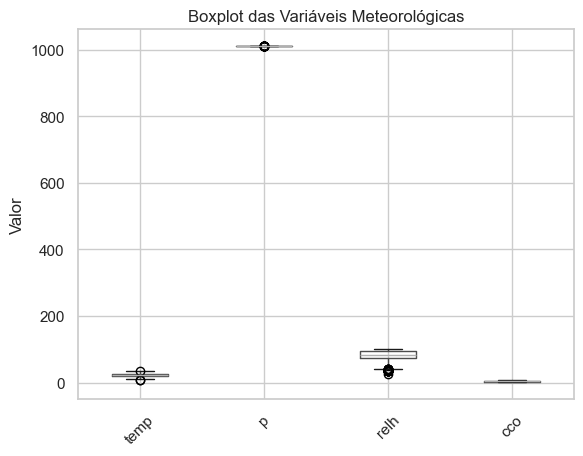

              temp            p         relh          cco
count  8758.000000  8758.000000  8758.000000  6726.000000
mean     22.027059  1009.654998    82.244043     4.658175
std       4.018442     0.019193    14.438457     2.414057
min       9.000000  1009.591350    24.590000     1.000000
25%      19.000000  1009.640461    72.380000     3.000000
50%      22.000000  1009.654835    83.440000     6.000000
75%      25.000000  1009.669209    94.060000     6.000000
max      35.000000  1009.863280   100.000000     8.000000


In [12]:
#Boxplots e Estatísticas Descritivas Das minha variaveis


import pandas as pd
import matplotlib.pyplot as plt
import os

# Carregar os dados
file_path = r'C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\inputs\meteoSuperficie\metar_2023.csv'
metSuperficie = pd.read_csv(file_path)

# Selecionar variáveis de interesse
variables = ['temp', 'p', 'relh', 'cco']

# Plotar boxplots
metSuperficie[variables].boxplot()

plt.title('Boxplot das Variáveis Meteorológicas')
plt.ylabel('Valor')
plt.xticks(rotation=45)

# Diretório para salvar as figuras
output_dir = r'C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\Figuras'
if not os.path.exists(output_dir):
        os.makedirs(output_dir)

# Salvar a figura
fig_path = os.path.join(output_dir, 'boxplot_variaveis_meteorologicas.png')
plt.savefig(fig_path)

plt.show()

# Calcular estatísticas descritivas
desc_stats = metSuperficie[variables].describe()
print(desc_stats)

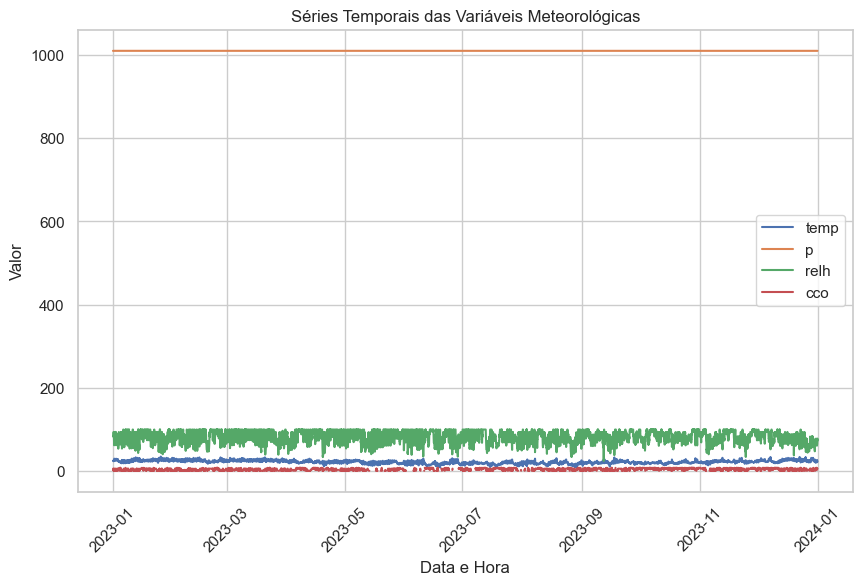

In [13]:
#Análise Temporal:
import pandas as pd
import matplotlib.pyplot as plt
import os

# Converter a coluna de data/hora para datetime
metSuperficie['datetime'] = pd.to_datetime(metSuperficie[['year', 'month', 'day', 'hour']])

# Plotar séries temporais
plt.figure(figsize=(10, 6))
for var in variables:
    plt.plot(metSuperficie['datetime'], metSuperficie[var], label=var)
plt.title('Séries Temporais das Variáveis Meteorológicas')
plt.xlabel('Data e Hora')
plt.ylabel('Valor')
plt.legend()
plt.xticks(rotation=45)

# Diretório para salvar as figuras
output_dir = r'C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\Figuras'
if not os.path.exists(output_dir):
        os.makedirs(output_dir)

# Salvar a figura
fig_path = os.path.join(output_dir, 'series_temporais_variaveis_meteorologicas.png')
plt.savefig(fig_path)

plt.show()

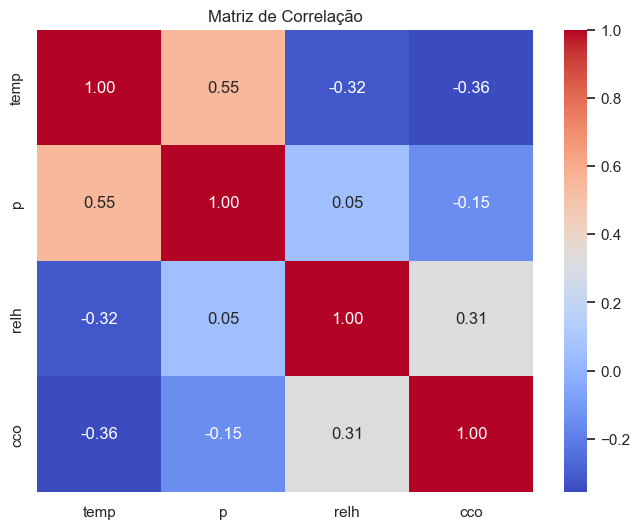

In [14]:
#Análise de Correlação:

import seaborn as sns
import matplotlib.pyplot as plt
import os

# Calcular a matriz de correlação
correlation_matrix = metSuperficie[variables].corr()

# Plotar mapa de calor da matriz de correlação
plt.figure(figsize=(8, 6))
plt.title('Matriz de Correlação')
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")

# Diretório para salvar as figuras
output_dir = r'C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\Figuras'
if not os.path.exists(output_dir):
        os.makedirs(output_dir)

# Salvar a figura
fig_path = os.path.join(output_dir, 'mapa_calor_correlacao.png')
plt.savefig(fig_path)

plt.show()

Nesta parte vamos analisar os dados de sondagem coletados em Florianópolis utilizando a biblioteca Siphon do Python.

In [15]:
from datetime import datetime

#from metpy.units import units

from siphon.simplewebservice.wyoming import WyomingUpperAir

# Data para análise
date = datetime(2024, 1, 10, 12)
# local da análise
station = 'SBFL'

# Extraindo os dados
df = WyomingUpperAir.request_data(date, station)
print(df)

     pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0      1011.0      5.0         27.8      22.8        330      6   3.000000   
1      1000.0    105.0         26.0      21.2        315      8   5.656854   
2       964.0    428.0         23.6      19.1        315     13   9.192388   
3       925.0    790.0         23.0      15.0        355     15   1.307336   
4       911.0    923.0         22.6      13.6          7     17  -2.071779   
..        ...      ...          ...       ...        ...    ...        ...   
109      19.0  26746.0        -51.3     -86.1         90     30 -30.000000   
110      17.0  27474.0        -48.7     -85.2         85     43 -42.836372   
111      16.0  27871.0        -47.3     -84.7         95     48 -47.817346   
112      15.3  28164.0        -46.3     -84.3         88     45 -44.972587   
113      15.0      NaN          NaN       NaN         85     44 -43.832567   

           v_wind station  station_number                time  

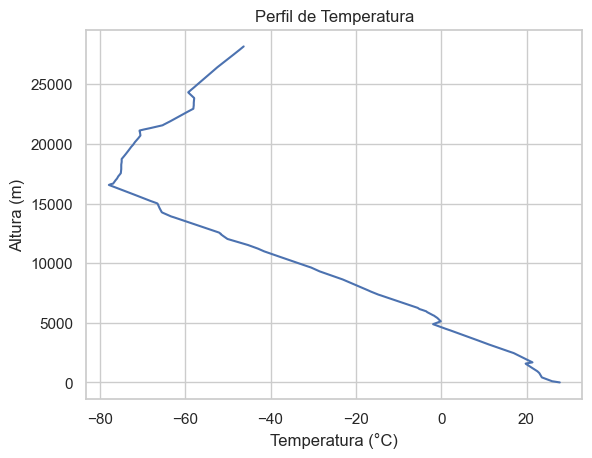

In [16]:
# Fazendo figura do perfil de temperatura

import matplotlib.pyplot as plt
import os

# Plot do perfil de temperatura
fig, ax = plt.subplots()
ax.plot(df['temperature'], df['height'])
ax.set_xlabel('Temperatura (°C)')
ax.set_ylabel('Altura (m)')
ax.set_title('Perfil de Temperatura')
plt.grid(True)

# Diretório para salvar as figuras
output_dir = r'C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\Figuras'
if not os.path.exists(output_dir):
        os.makedirs(output_dir)

# Salvar a figura
fig_path = os.path.join(output_dir, 'perfil_temperatura.png')
plt.savefig(fig_path)

plt.show()

     pressure   height  temperature  dewpoint  direction  speed     u_wind  \
0      1011.0      5.0         27.8      22.8        330      6   3.000000   
1      1000.0    105.0         26.0      21.2        315      8   5.656854   
2       964.0    428.0         23.6      19.1        315     13   9.192388   
3       925.0    790.0         23.0      15.0        355     15   1.307336   
4       911.0    923.0         22.6      13.6          7     17  -2.071779   
..        ...      ...          ...       ...        ...    ...        ...   
109      19.0  26746.0        -51.3     -86.1         90     30 -30.000000   
110      17.0  27474.0        -48.7     -85.2         85     43 -42.836372   
111      16.0  27871.0        -47.3     -84.7         95     48 -47.817346   
112      15.3  28164.0        -46.3     -84.3         88     45 -44.972587   
113      15.0      NaN          NaN       NaN         85     44 -43.832567   

           v_wind station  station_number                time  

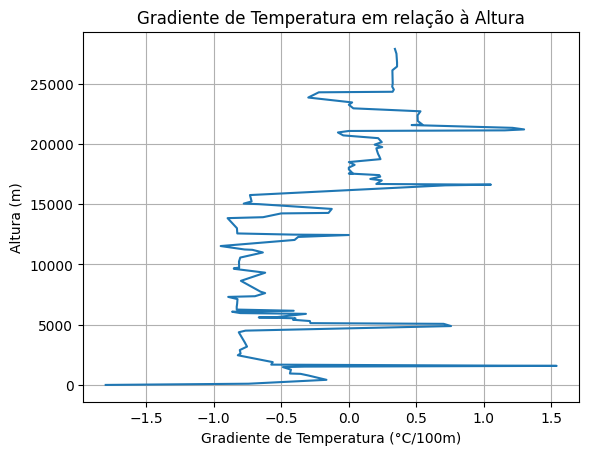

In [4]:
# Calcular gradiente de temperatura em relação a altura

import numpy as np
import matplotlib.pyplot as plt
import os
from datetime import datetime
from siphon.simplewebservice.wyoming import WyomingUpperAir

# Data para análise
date = datetime(2024, 1, 10, 12)
# Local da análise
station = 'SBFL'

# Extraindo os dados
df = WyomingUpperAir.request_data(date, station)
print(df)

# Calcular o gradiente de temperatura
deltaT = np.diff(df['temperature'])
deltaZ = np.diff(df['height'])

dTdZ = (deltaT / deltaZ) * 100  # a cada 100 m
print(dTdZ)

# Plot do gradiente de temperatura em relação à altura
fig, ax = plt.subplots()
ax.plot(dTdZ, df['height'][:-1])
ax.set_xlabel('Gradiente de Temperatura (°C/100m)')
ax.set_ylabel('Altura (m)')
ax.set_title('Gradiente de Temperatura em relação à Altura')
plt.grid(True)

# Diretório para salvar as figuras
output_dir = r'C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\Figuras'
if not os.path.exists(output_dir):
        os.makedirs(output_dir)

# Salvar a figura
fig_path = os.path.join(output_dir, 'gradiente_temperatura_altura.png')
plt.savefig(fig_path)

plt.show()

In [20]:
pip install cartopy

['Best GFS Quarter Degree Forecast Time Series']
['reftime', 'latitude', 'time', 'longitude', 'Temperature_surface', 'LatLon_721X1440-0p13S-180p00E-2']


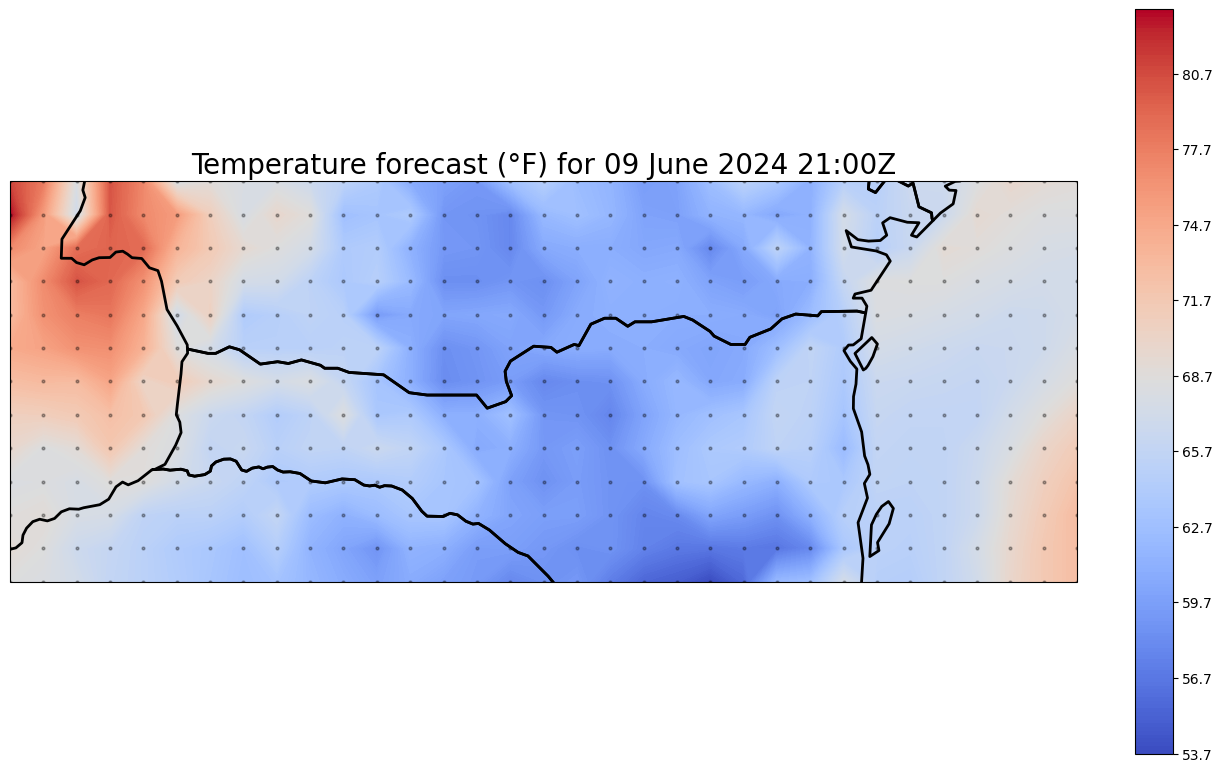

In [5]:
from datetime import datetime

import cartopy.crs as ccrs
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
from netCDF4 import num2date
import numpy as np
from siphon.catalog import TDSCatalog

best_gfs = TDSCatalog('http://thredds.ucar.edu/thredds/catalog/grib/NCEP/GFS/'
                      'Global_0p25deg/catalog.xml?dataset=grib/NCEP/GFS/Global_0p25deg/Best')
print(list(best_gfs.datasets))

best_ds = best_gfs.datasets[0]
ncss = best_ds.subset()

query = ncss.query()

query.lonlat_box(north=-25, south=-28, east=-47, west=-55).time(datetime.utcnow())  # Corrigido aqui
query.accept('netcdf4')
query.variables('Temperature_surface')

data = ncss.get_data(query)
print(list(data.variables))

temp_var = data.variables['Temperature_surface']  # Podem analisar outras variáveis.

# Time variables can be renamed in GRIB collections. Best to just pull it out of the
# coordinates attribute on temperature
time_name = temp_var.coordinates.split()[1]
time_var = data.variables[time_name]
lat_var = data.variables['latitude']
lon_var = data.variables['longitude']

# Get the actual data values and remove any size 1 dimensions
temp_vals = temp_var[:].squeeze()
lat_vals = lat_var[:].squeeze()
lon_vals = lon_var[:].squeeze()

# Convert the number of hours since the reference time to an actual date
time_val = num2date(time_var[:].squeeze(), time_var.units)

# Convert temps to Fahrenheit from Kelvin
temp_vals = temp_vals * 1.8 - 459.67

# Combine 1D latitude and longitudes into a 2D grid of locations
lon_2d, lat_2d = np.meshgrid(lon_vals, lat_vals)

# Create a new figure
fig = plt.figure(figsize=(15, 12))

# Add the map and set the extent
ax = plt.axes(projection=ccrs.PlateCarree())
ax.set_extent([-55., -47., -28, -25])

# Add state boundaries to plot
ax.add_feature(cfeature.STATES.with_scale('50m'), linewidth=2)

# Contour temperature at each lat/long
cf = ax.contourf(lon_2d, lat_2d, temp_vals, 200, transform=ccrs.PlateCarree(), zorder=0,
                 cmap='coolwarm')

# Plot a colorbar to show temperature and reduce the size of it
plt.colorbar(cf, ax=ax, fraction=0.032)

# Make a title with the time value
ax.set_title(u'Temperature forecast (\u00b0F) for {0:%d %B %Y %H:%MZ}'.format(time_val),
             fontsize=20)

# Plot markers for each lat/long to show grid points for 0.25 deg GFS
ax.plot(lon_2d.flatten(), lat_2d.flatten(), marker='o', color='black', markersize=2,
        alpha=0.3, transform=ccrs.Geodetic(), zorder=2, linestyle='none')

# Salvar a figura no diretório especificado
plt.savefig(r'C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\Figuras\temperature_forecast.png')

plt.show()

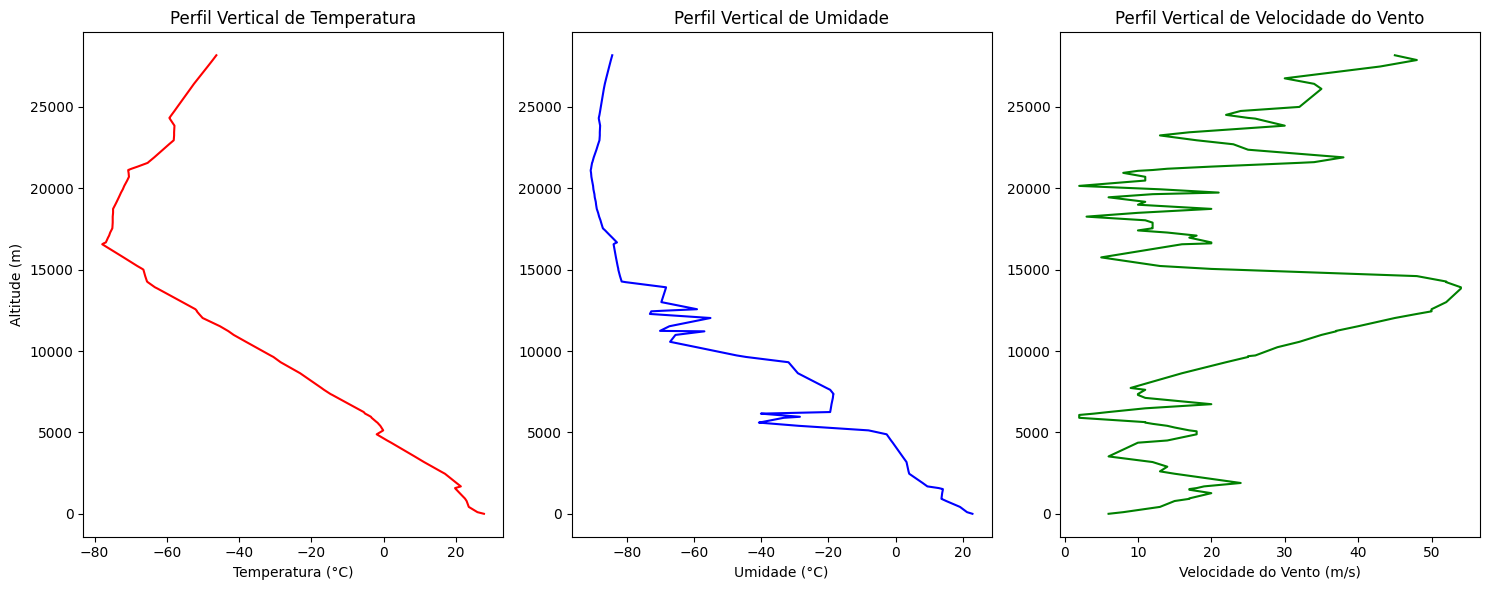

In [6]:
# Construção de Perfis Verticais de Temperatura, Umidade e Vento na Atmosfera (MeteoSondagem):


import os

# Data e local da análise
date = datetime(2024, 1, 10, 12)
station = 'SBFL'

# Extraindo os dados da sondagem atmosférica
df = WyomingUpperAir.request_data(date, station)

# Criando o perfil vertical
fig, axs = plt.subplots(1, 3, figsize=(15, 6))

# Temperatura
axs[0].plot(df['temperature'], df['height'], color='red')
axs[0].set_xlabel('Temperatura (°C)')
axs[0].set_ylabel('Altitude (m)')
axs[0].set_title('Perfil Vertical de Temperatura')

# Umidade
axs[1].plot(df['dewpoint'], df['height'], color='blue')
axs[1].set_xlabel('Umidade (°C)')
axs[1].set_title('Perfil Vertical de Umidade')

# Velocidade do vento
axs[2].plot(df['speed'], df['height'], color='green')
axs[2].set_xlabel('Velocidade do Vento (m/s)')
axs[2].set_title('Perfil Vertical de Velocidade do Vento')

plt.tight_layout()

# Diretório para salvar as figuras
output_dir = r'C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\Figuras'
if not os.path.exists(output_dir):
        os.makedirs(output_dir)

# Salvar a figura
fig_path = os.path.join(output_dir, 'perfil_vertical_atmosfera.png')
plt.savefig(fig_path)

plt.show()

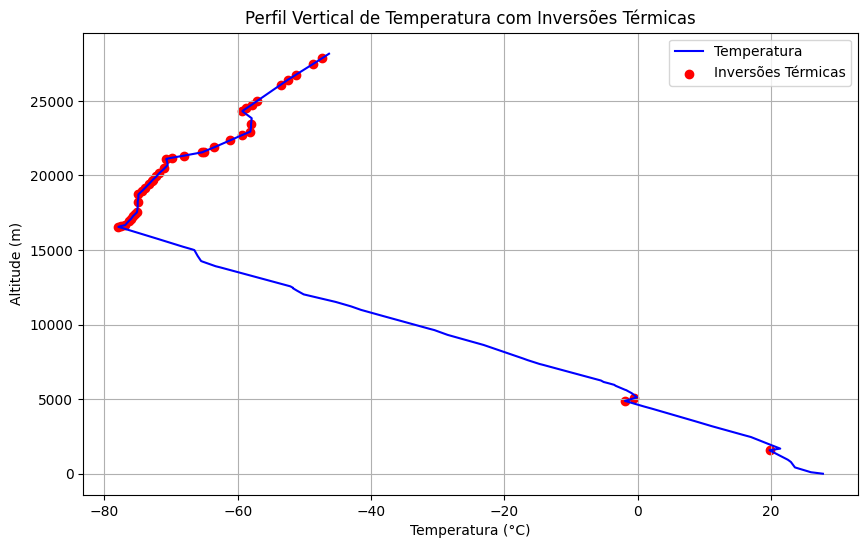

In [7]:
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir

# Data e local da análise
date = datetime(2024, 1, 10, 12)
station = 'SBFL'

# Extraindo os dados da sondagem atmosférica
df = WyomingUpperAir.request_data(date, station)

# Calcular gradientes de temperatura
delta_T = np.diff(df['temperature'])
delta_Z = np.diff(df['height'])

# Ajustar o comprimento dos gradientes de temperatura
delta_T_adjusted = delta_T
delta_Z_adjusted = delta_Z

# Verificar se os gradientes de temperatura e altitude têm o mesmo comprimento
if len(delta_T_adjusted) != len(delta_Z_adjusted):
    min_length = min(len(delta_T_adjusted), len(delta_Z_adjusted))
    delta_T_adjusted = delta_T_adjusted[:min_length]
    delta_Z_adjusted = delta_Z_adjusted[:min_length]

# Calcular o gradiente de temperatura vertical (dT/dZ)
dTdZ = (delta_T_adjusted / delta_Z_adjusted) * 100  # em graus Celsius por 100 metros

# Identificar inversões térmicas (onde dT/dZ > 0)
inversoes_termicas = df.iloc[:-1][dTdZ > 0]

# Plotar perfil de temperatura e marcar inversões térmicas
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(df['temperature'], df['height'], label='Temperatura', color='blue')
ax.scatter(inversoes_termicas['temperature'], inversoes_termicas['height'], color='red', marker='o', label='Inversões Térmicas')
ax.set_xlabel('Temperatura (°C)')
ax.set_ylabel('Altitude (m)')
ax.set_title('Perfil Vertical de Temperatura com Inversões Térmicas')
ax.legend()
plt.grid(True)

# Salvar a figura no diretório especificado
plt.savefig(r'C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\Figuras\perfil_temperatura_inversoes_termicas.png')

plt.show()

Nesta parte analisaremos os dados de temperatura em uma região utilizando previsão meteorológica.

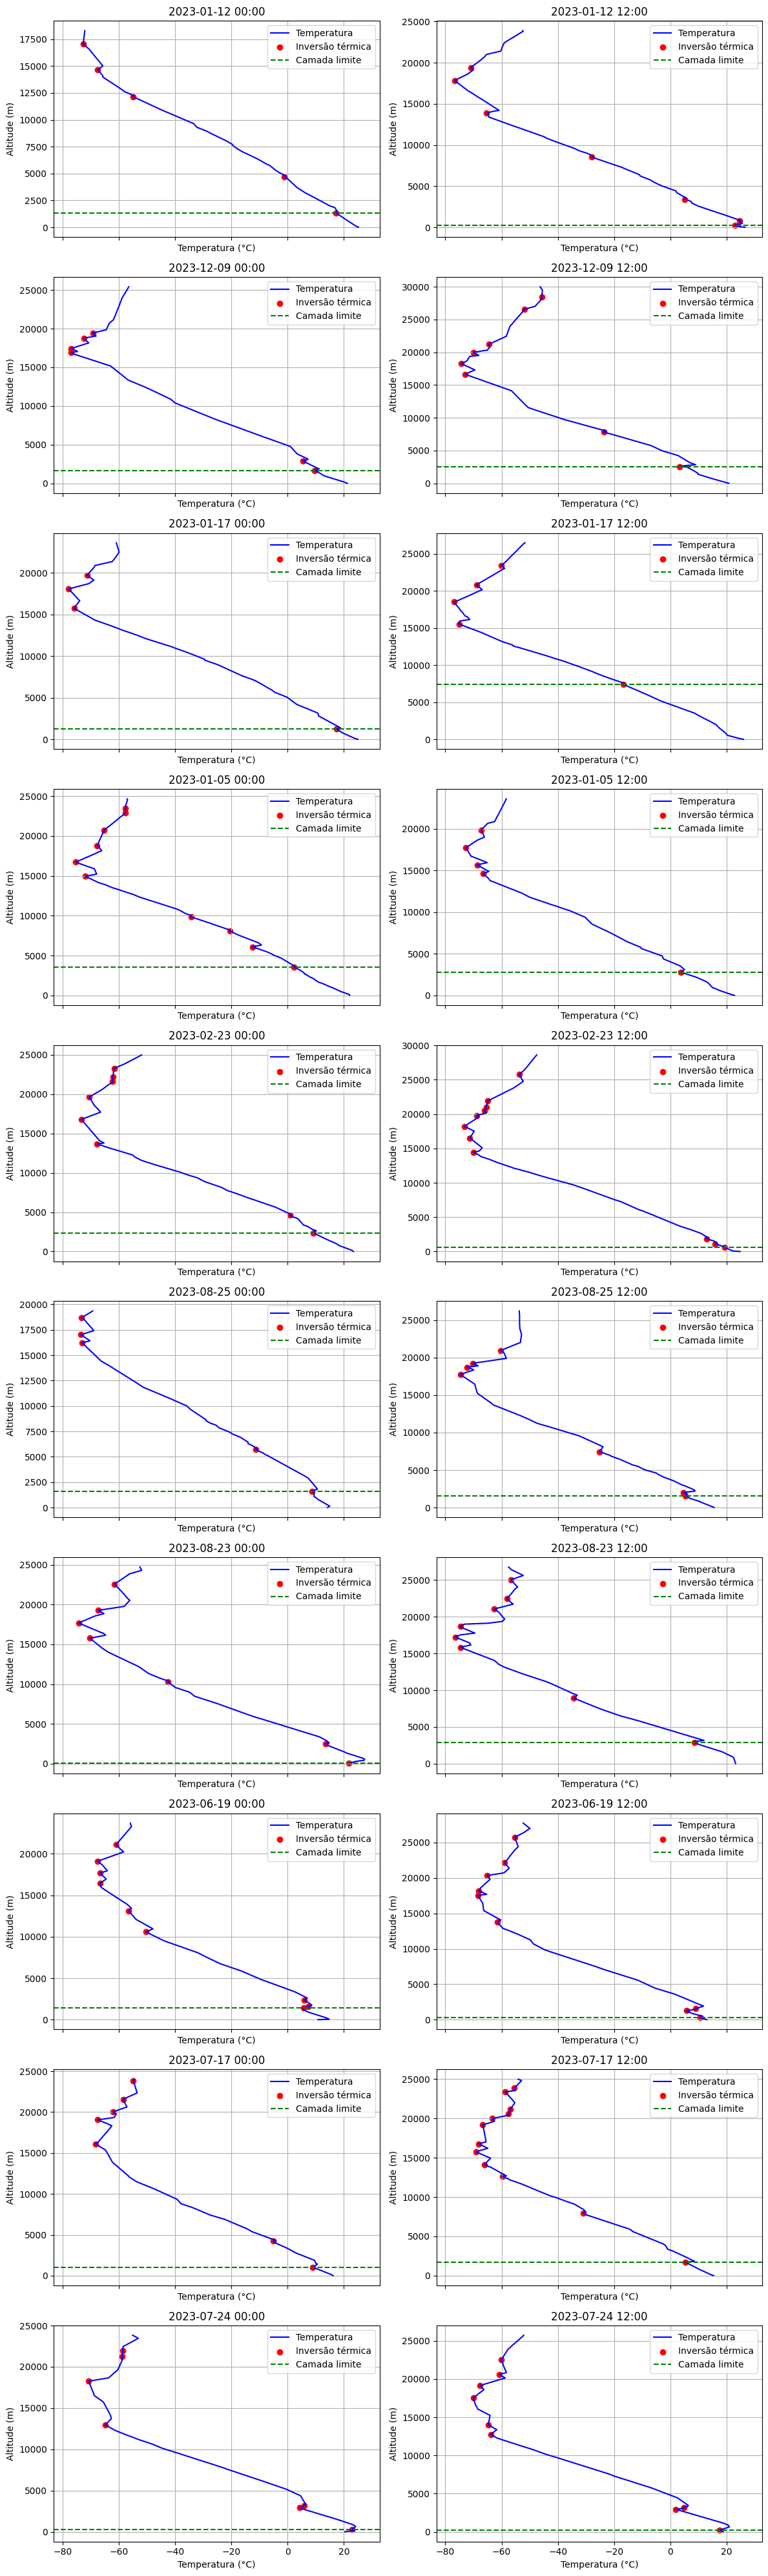

In [8]:
from datetime import datetime
import random
import matplotlib.pyplot as plt
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir

# Local da análise
station = 'SBFL'
fig, ax = plt.subplots(10, 2, sharex=True, figsize=(12, 40))  # Ajuste do tamanho e da disposição dos subplots

# Gerado aleatoriamente pelo código acima
dia = [12, 9, 17, 5, 23, 25, 23, 19, 17, 24]
mes = [1, 12, 1, 1, 2, 8, 8, 6, 7, 7]

for i in range(10):
    for j in range(2):
        hora = [0, 12]
        date = datetime(2023, mes[i], dia[i], hora[j])
        df = WyomingUpperAir.request_data(date, station)
        
        # Plotando os dados
        ax[i, j].plot(df['temperature'], df['height'], color='blue', label='Temperatura')
        ax[i, j].set_title(date.strftime('%Y-%m-%d %H:%M'), fontsize=12)
        ax[i, j].set_xlabel('Temperatura (°C)', fontsize=10)
        ax[i, j].set_ylabel('Altitude (m)', fontsize=10)
        ax[i, j].grid(True)
        
        # Identificando pontos de inversão térmica
        inversao = []
        for num in range(1, len(df['temperature']) - 1):
            if df['temperature'][num+1] > df['temperature'][num] and df['temperature'][num-1] >= df['temperature'][num]:
                inversao.append(num)
        inversao = np.array(inversao)
        ax[i, j].scatter(df['temperature'][inversao], df['height'][inversao], color='red', marker='o', label='Inversão térmica')
        
        # Indentificando a camada limite
        ax[i, j].axhline(y=df['height'][inversao[0]], color='green', linestyle='--', label='Camada limite')
        
        # Adicionando legenda
        ax[i, j].legend(fontsize=10)

plt.tight_layout()
plt.show()

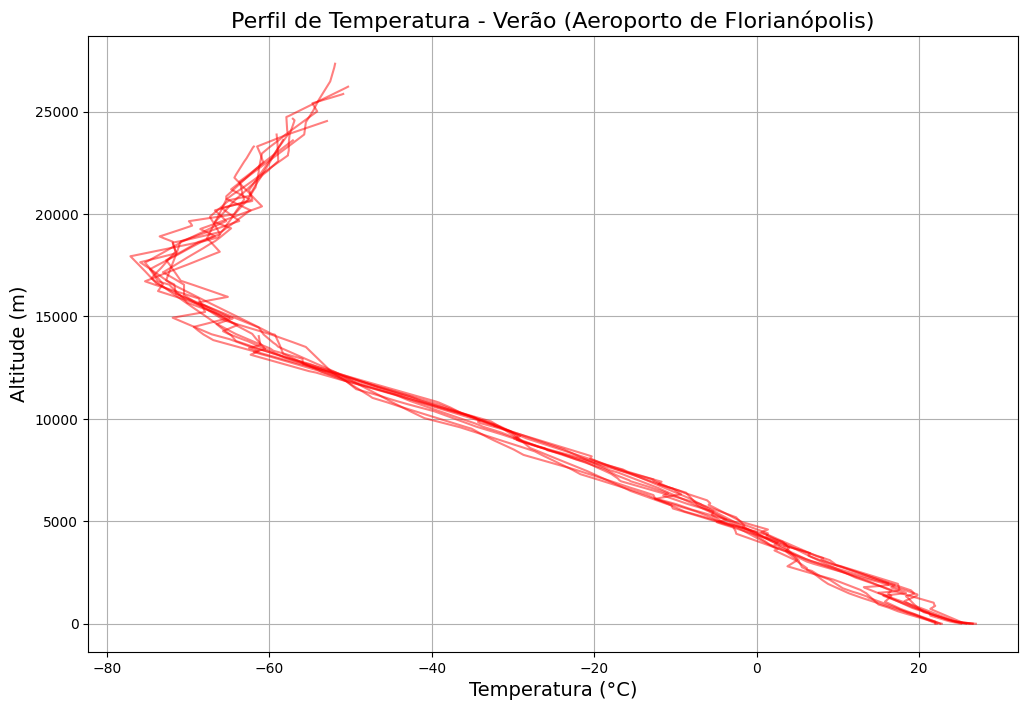

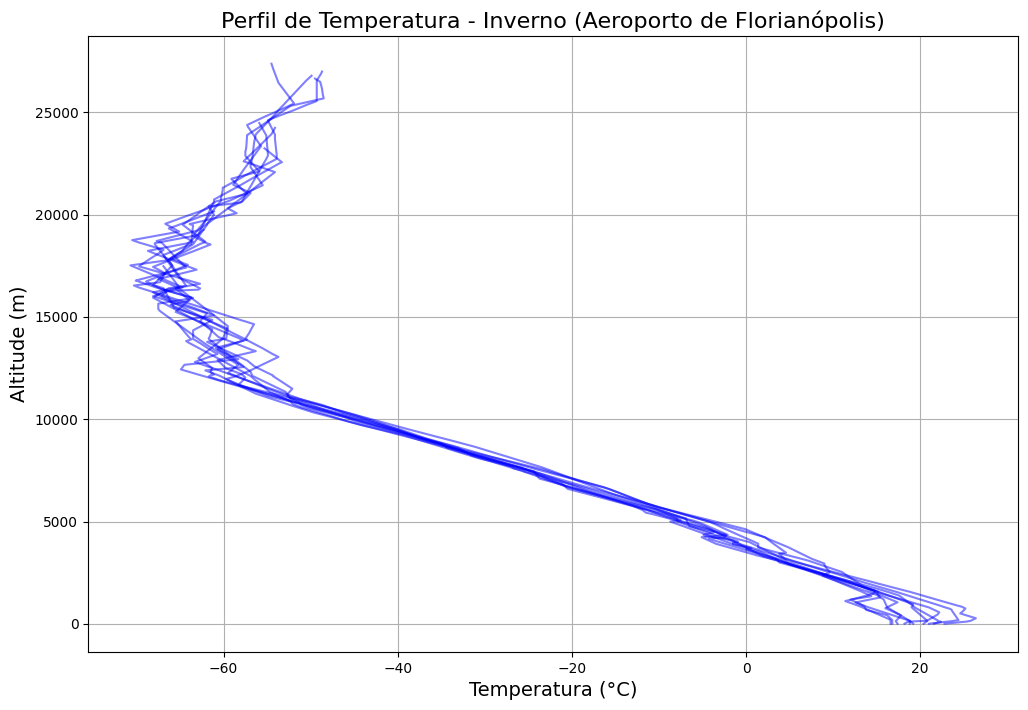

In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
import numpy as np
from siphon.simplewebservice.wyoming import WyomingUpperAir
from datetime import datetime, timedelta
import os
import time
import requests

# Função para carregar dados fictícios - Substitua por sua lógica de carregamento
def load_upperair_data(filepath):
    # Implementar lógica para carregar dados de sondagem atmosférica
    pass

def load_surface_data(filepath):
    # Implementar lógica para carregar dados de superfície
    pass

# Definir as datas para análise (5 dias de verão e 5 dias de inverno)
datas_verao = [datetime(2023, 1, dia, hora) for dia in range(1, 6) for hora in [0, 12]]
datas_inverno = [datetime(2023, 6, dia, hora) for dia in range(21, 26) for hora in [0, 12]]
datas_analise = datas_verao + datas_inverno

# Definir local da estação de monitoramento no aeroporto de Florianópolis
station = 'SBFL'

# Listas para armazenar os dados
perfil_temperatura_verao = []
perfil_temperatura_inverno = []

# Função para determinar inversão térmica e altura da camada limite
def determinar_inversao_camadalimite(df):
    altura_inversao = None
    camada_limite = None
    for i in range(1, len(df)):
        if df['temperature'][i] > df['temperature'][i - 1]:
            altura_inversao = df['height'][i]
            break
    for i in range(len(df) - 1, 0, -1):
        if df['temperature'][i] < df['temperature'][i - 1]:
            camada_limite = df['height'][i]
            break
    return altura_inversao, camada_limite

# Função para tentar obter os dados com repetição
def get_data_with_retry(date, station, max_retries=3, wait_seconds=5):
    for attempt in range(max_retries):
        try:
            return WyomingUpperAir.request_data(date, station)
        except requests.HTTPError as e:
            if attempt < max_retries - 1:
                print(f"Erro ao obter dados para {date.strftime('%Y-%m-%d %H:%M')} ({e}). Tentando novamente em {wait_seconds} segundos...")
                time.sleep(wait_seconds)
            else:
                raise

# Realizar a análise do perfil de temperatura para cada data
for date in datas_analise:
    try:
        # Extraindo os dados da sondagem atmosférica
        df = get_data_with_retry(date, station)

        # Determinar a inversão térmica e a altura da camada limite
        altura_inversao, camada_limite = determinar_inversao_camadalimite(df)

        # Adicionar dados à lista apropriada (verão ou inverno)
        if date in datas_verao:
            perfil_temperatura_verao.append((df['temperature'], df['height'], altura_inversao, camada_limite))
        elif date in datas_inverno:
            perfil_temperatura_inverno.append((df['temperature'], df['height'], altura_inversao, camada_limite))
    except Exception as e:
        print(f"Erro ao obter dados para {date.strftime('%Y-%m-%d %H:%M')}: {e}")

# Função para normalizar as temperaturas para a geração de cores
def normalize_temperatures(temperatures):
    norm = Normalize(vmin=min(temperatures), vmax=max(temperatures))
    return [norm(temp) for temp in temperatures]

# Diretório para salvar as figuras
output_dir = r'C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\Figuras'
if not os.path.exists(output_dir):
        os.makedirs(output_dir)

# Plotar perfil de temperatura para o verão
plt.figure(figsize=(12, 8))
for temp, height, _, _ in perfil_temperatura_verao:
    plt.plot(temp, height, color='red', alpha=0.5)

# Configurar título e rótulos
plt.title('Perfil de Temperatura - Verão (Aeroporto de Florianópolis)', fontsize=16)
plt.xlabel('Temperatura (°C)', fontsize=14)
plt.ylabel('Altitude (m)', fontsize=14)
plt.grid(True)

# Salvar figura
plt.savefig(os.path.join(output_dir, 'perfil_temperatura_verao.png'))

# Exibir o gráfico
plt.show()
plt.close()

# Plotar perfil de temperatura para o inverno
plt.figure(figsize=(12, 8))
for temp, height, _, _ in perfil_temperatura_inverno:
    plt.plot(temp, height, color='blue', alpha=0.5)

# Configurar título e rótulos
plt.title('Perfil de Temperatura - Inverno (Aeroporto de Florianópolis)', fontsize=16)
plt.xlabel('Temperatura (°C)', fontsize=14)
plt.ylabel('Altitude (m)', fontsize=14)
plt.grid(True)

# Salvar figura
plt.savefig(os.path.join(output_dir, 'perfil_temperatura_inverno.png'))

# Exibir o gráfico
plt.show()

C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\tabelas\FE
chp_10_2.csv
                Processo Sigla
0        Digester relief    DR
1                 Washer    WS
2             Evaporator    EV
3        Recovery boiler    RB
4  Noncontact Evaporator   NCE
5        Dissolving tank    DT
6                   Kiln    KL
7              Condenser    CD


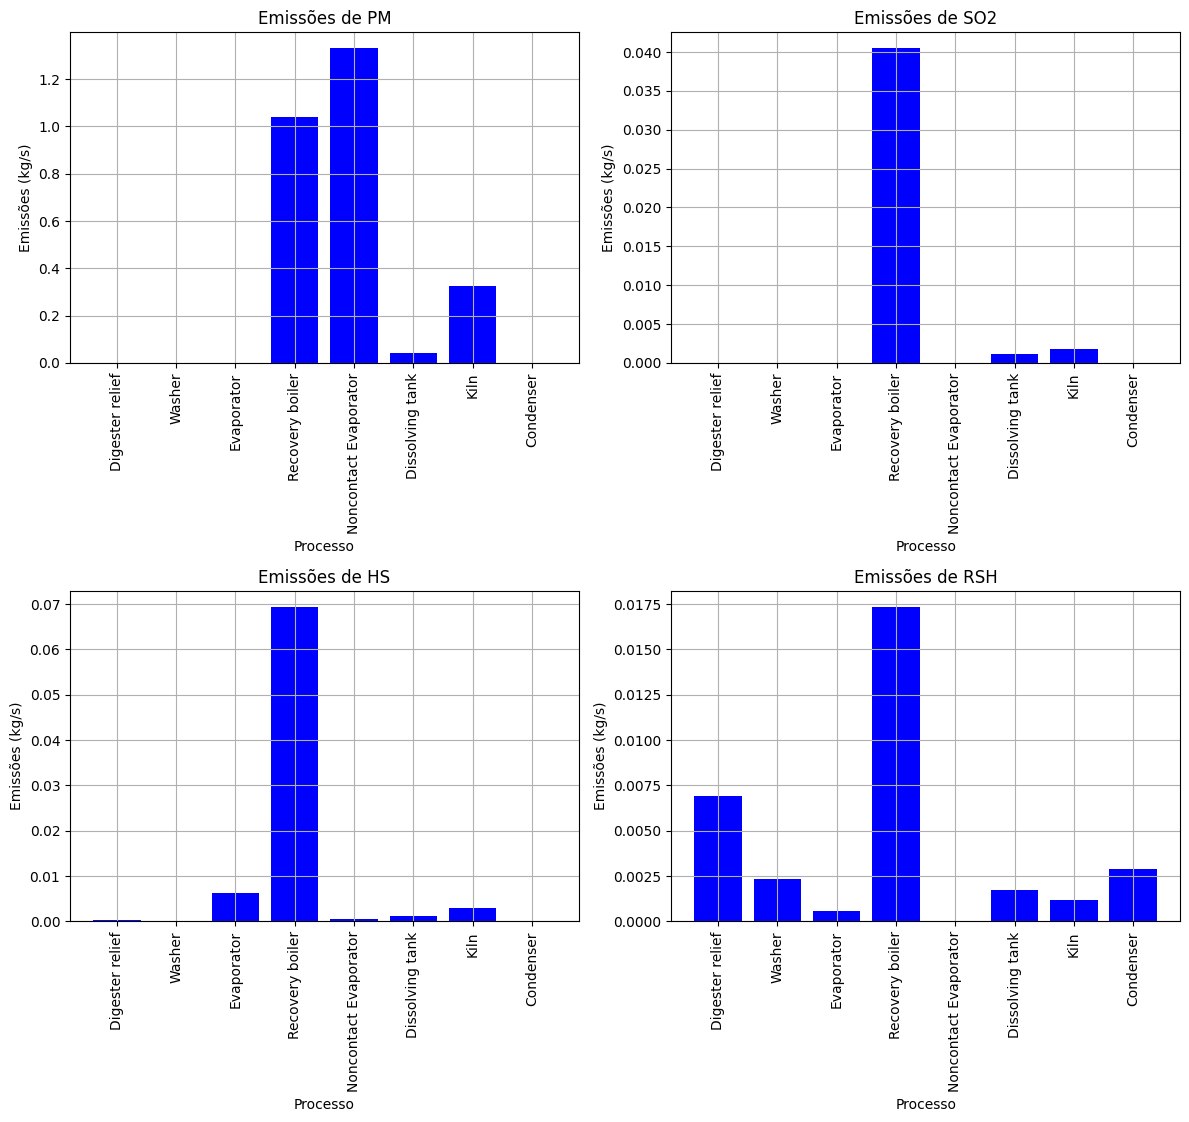

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Pasta dos fatores de emissão
path = r'C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\tabelas\FE'
print(path)

# Definindo o número do capítulo e subcapítulo
chapter_number = 10
subchapter = 2

# Criando o nome do arquivo
file = f'chp_{chapter_number}_{subchapter}.csv'
print(file)

# Definindo os processos e suas siglas
processos = [
    "Digester relief",
    "Washer",
    "Evaporator",
    "Recovery boiler",
    "Noncontact Evaporator",
    "Dissolving tank",
    "Kiln",
    "Condenser"
]

siglas = [
    "DR",
    "WS",
    "EV",
    "RB",
    "NCE",
    "DT",
    "KL",
    "CD" 
]

# Criar DataFrame
df = pd.DataFrame({
    'Processo': processos,
    'Sigla': siglas
})

# Exibir o DataFrame
print(df)

# Dados de exemplo
dados = {
    'Processo': ['Digester relief', 'Washer', 'Evaporator', 'Recovery boiler', 'Noncontact Evaporator', 'Dissolving tank', 'Kiln', 'Condenser'],
    'Sigla': ['DR', 'WS', 'EV', 'RB', 'NCE', 'DT', 'KL', 'CD'],
    'PM (kg/Mg)': [0.000, 0.000, 0.000, 90.000, 115.000, 3.500, 28.000, 0.000],
    'SO2 (kg/Mg)': [0.000, 0.000, 0.000, 3.500, 0.000, 0.100, 0.1500, 0.000],
    'HS (kg/Mg)': [0.020, 0.010, 0.550, 6.000, 0.050, 0.100, 0.250, 0.005],
    'RSH (kg/Mg)': [0.600, 0.200, 0.050, 1.500, 0.000, 0.150, 0.100, 0.250],

}

# Criando DataFrame a partir dos dados
df = pd.DataFrame(dados)

# Convertendo de kg/Mg para kg/s
df.iloc[:, 2:] *= (1000) / (24 * 3600)  # Convertendo de kg/Mg para kg/s

# Renomeando as colunas para remover "(kg/Mg)" dos rótulos
df.rename(columns=lambda x: x.replace(' (kg/Mg)', ''), inplace=True)

# Definindo os processos
processos = df['Processo']

# Definindo as emissões para cada processo
emissoes = df.drop(columns=['Processo', 'Sigla'])

# Plotando as emissões para cada poluente e processo
plt.figure(figsize=(12, 15))

# Iterando sobre cada poluente
for idx, poluente in enumerate(emissoes.columns):
    plt.subplot(3, 2, idx+1)
    plt.bar(processos, emissoes[poluente], color='blue')
    plt.title(f'Emissões de {poluente}')
    plt.ylabel('Emissões (kg/s)')  # Atualizando o rótulo do eixo Y
    plt.xlabel('Processo')
    plt.xticks(rotation=90)
    plt.grid(True)

plt.tight_layout()

# Exportando o gráfico como um arquivo PNG
plt.savefig(R'C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\Figuras\poluentes_e_processos.png')

plt.show()

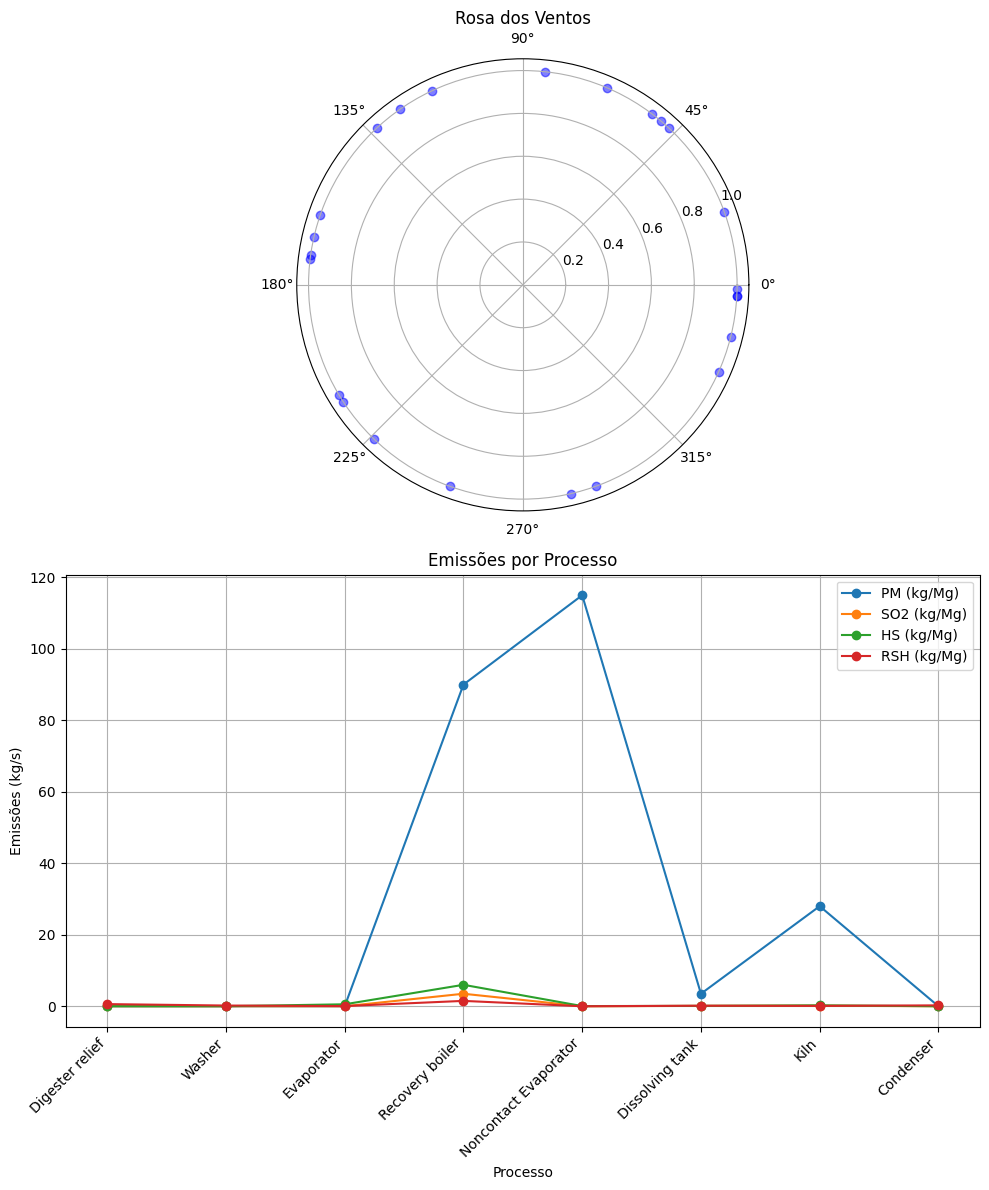

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Dados de exemplo das emissões por processo
dados_emissoes = {
    'Processo': ['Digester relief', 'Washer', 'Evaporator', 'Recovery boiler', 'Noncontact Evaporator', 'Dissolving tank', 'Kiln', 'Condenser'],
    'Sigla': ['DR', 'WS', 'EV', 'RB', 'NCE', 'DT', 'KL', 'CD'],
    'PM (kg/Mg)': [0.000, 0.000, 0.000, 90.000, 115.000, 3.500, 28.000, 0.000],
    'SO2 (kg/Mg)': [0.000, 0.000, 0.000, 3.500, 0.000, 0.100, 0.1500, 0.000],
    'HS (kg/Mg)': [0.020, 0.010, 0.550, 6.000, 0.050, 0.100, 0.250, 0.005],
    'RSH (kg/Mg)': [0.600, 0.200, 0.050, 1.500, 0.000, 0.150, 0.100, 0.250],
}

# DataFrame das emissões
df_emissoes = pd.DataFrame(dados_emissoes)

# Dados de exemplo das direções do vento (em graus)
direcoes_vento = {
    'Hora': np.arange(0, 24),
    'Direcao_Vento': np.random.randint(0, 360, size=24)  # Exemplo de direções de vento aleatórias
}

# DataFrame das direções do vento
df_vento = pd.DataFrame(direcoes_vento)

# Criar figura e subplots
fig = plt.figure(figsize=(10, 12))

# Plotar a rosa dos ventos
ax1 = plt.subplot(2, 1, 1, projection='polar')
theta = df_vento['Direcao_Vento'] * np.pi / 180
r = np.ones_like(theta)
ax1.scatter(theta, r, marker='o', color='b', alpha=0.5)
ax1.set_title('Rosa dos Ventos')

# Plotar as emissões por processo
ax2 = plt.subplot(2, 1, 2)
processos = df_emissoes['Processo']
emissoes = df_emissoes.drop(columns=['Processo', 'Sigla'])
for idx, poluente in enumerate(emissoes.columns):
    ax2.plot(processos, emissoes[poluente], marker='o', label=poluente)
ax2.set_title('Emissões por Processo')
ax2.set_xlabel('Processo')
ax2.set_ylabel('Emissões (kg/s)')
ax2.legend()
ax2.grid(True)
ax2.set_xticks(np.arange(len(processos)))  # Definir as marcas
ax2.set_xticklabels(processos, rotation=45, ha='right')

plt.tight_layout()

# Diretório para salvar as figuras
output_dir = r'C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\Figuras'
if not os.path.exists(output_dir):
        os.makedirs(output_dir)

graph_path = os.path.join(output_dir, 'emissions_wind_plot.png')

# Salvar o gráfico em formato PNG
plt.savefig(graph_path, format='png')


In [18]:
#analisar o arquivo METEO.SFC

import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from datetime import datetime

# Carregar os dados do arquivo METEO_dados_
file_path = r"C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\inputs\EZ_AERMOD_martinscica_2024-06-09\METEO.SFC.csv"
data = pd.read_csv(file_path)

print(data)

                                 Year  Month  Day  Julian Day  Hour  \
0                                  23    1.0  1.0         1.0   1.0   
1                                  23    1.0  1.0         1.0   2.0   
2                                  23    1.0  1.0         1.0   3.0   
3                                  23    1.0  1.0         1.0   4.0   
4                                  23    1.0  1.0         1.0   5.0   
...                               ...    ...  ...         ...   ...   
8781                               24    1.0  1.0         1.0  22.0   
8782                               24    1.0  1.0         1.0  23.0   
8783                               24    1.0  1.0         1.0  24.0   
8784                              NaN    NaN  NaN         NaN   NaN   
8785  generated  at www.envitrans.com    NaN  NaN         NaN   NaN   

      Sensible Heat Flux   Surface Friction Velocity  \
0                   -50.1                      0.573   
1                   -50.4          

   Surface Roughness Length  Bowen Ratio  Albedo
0                    0.9824         0.48     1.0
1                    1.0000         0.48     1.0
2                    1.0000         0.48     1.0
3                    1.0000         0.48     1.0
4                    1.0000         0.48     1.0
       Surface Roughness Length  Bowen Ratio       Albedo
count               8784.000000  8784.000000  8784.000000
mean                   0.964177     0.799672     0.593813
std                    0.521685     0.550393     0.636423
min                   -9.000000    -9.000000    -9.000000
25%                    0.981900     0.900000     0.180000
50%                    1.000000     0.930000     0.740000
75%                    1.000000     0.960000     1.000000
max                    1.000000     0.960000     1.000000


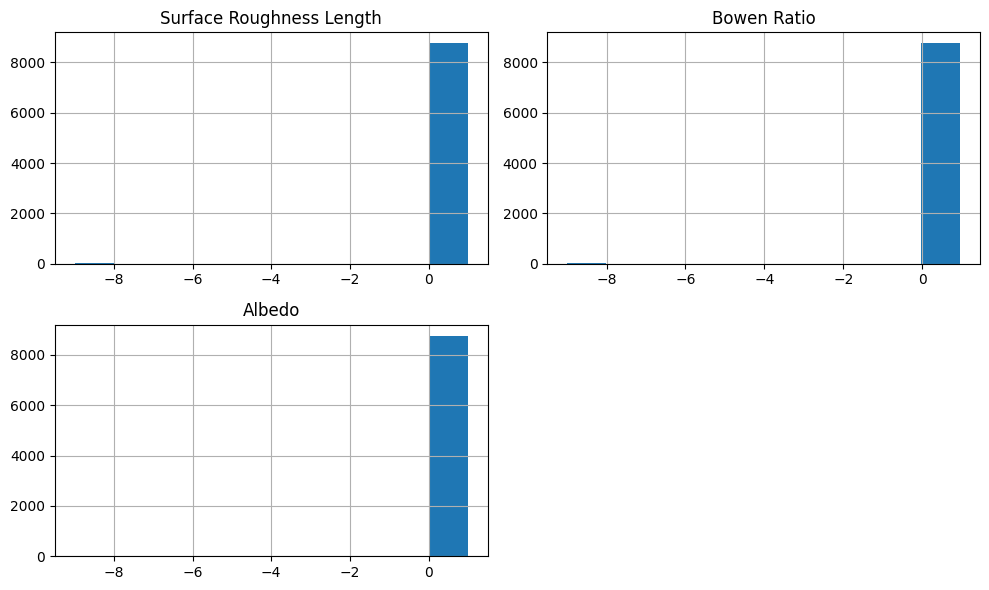

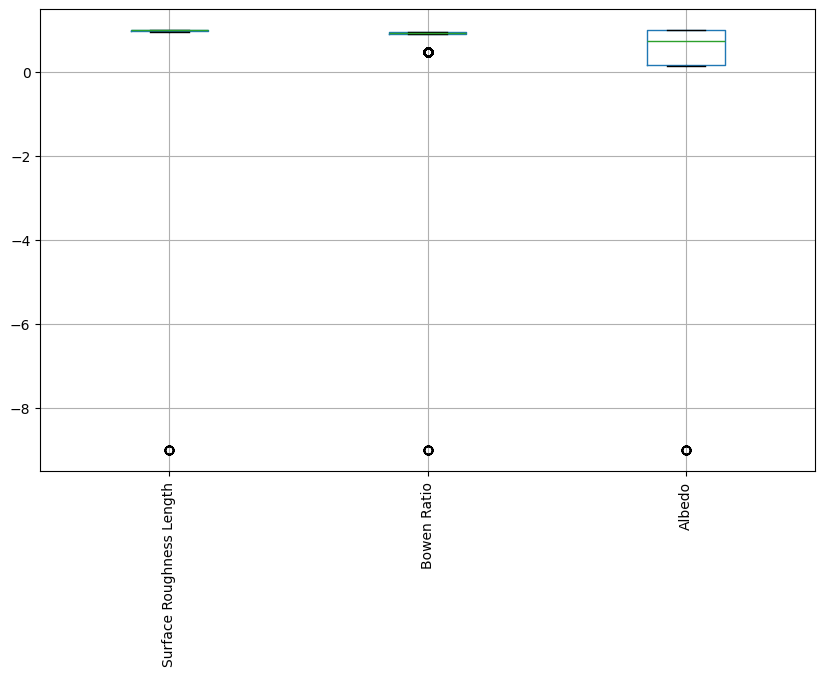

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Carregar os dados do arquivo METEO_dados_
file_path = r"C:\Users\cecil\OneDrive\Documentos\CPA\ENS5173\inputs\EZ_AERMOD_martinscica_2024-06-09\METEO.SFC.csv"
data = pd.read_csv(file_path)

# Selecionar as colunas de interesse: Rugosidade, Bowen e Albedo
variables_of_interest = [
    'Surface Roughness Length', 'Bowen Ratio', 'Albedo'
]
selected_data = data[variables_of_interest]

# Exibir as primeiras linhas das variáveis selecionadas
print(selected_data.head())

# Resumo estatístico das variáveis selecionadas
print(selected_data.describe())

# Histograma de cada variável selecionada
selected_data.hist(figsize=(10, 6))
plt.tight_layout()
plt.show()

# Boxplot de cada variável selecionada
selected_data.boxplot(figsize=(10, 6))
plt.xticks(rotation=90)
plt.show()

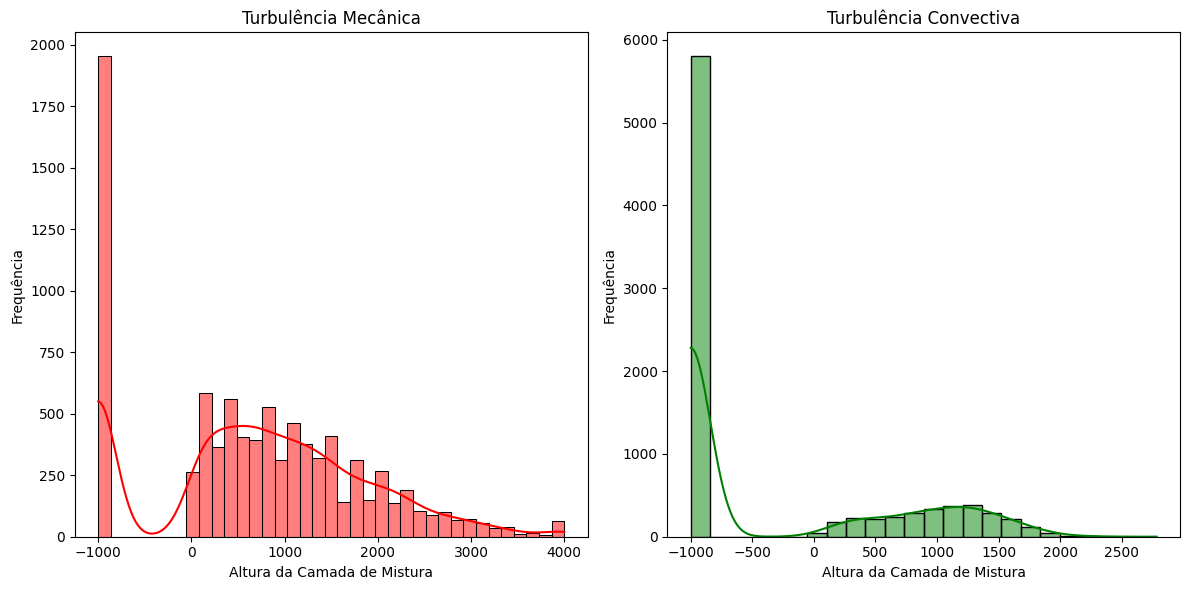

In [26]:
# Plotar histogramas para turbulência mecânica e convectiva
import seaborn as sns
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(data['Mechanical Mixing Height'], kde=True, color='red')
plt.title('Turbulência Mecânica')
plt.xlabel('Altura da Camada de Mistura')
plt.ylabel('Frequência')
plt.subplot(1, 2, 2)
sns.histplot(data['Convective Mixing Height'], kde=True, color='green')
plt.title('Turbulência Convectiva')
plt.xlabel('Altura da Camada de Mistura')
plt.ylabel('Frequência')
plt.tight_layout()
plt.show()